## 1. Import Section

#### importing necessary python module 

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
import os
print(os.listdir())
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

['heart_disease_data.csv', 'final.ipynb']


#### Dataset Import

In [2]:
dataset = pd.read_csv("heart_disease_data.csv")

In [3]:
dataset.shape

(59, 19)

In [4]:
dataset.head()

,age,sex,occupation,family_history,smoking,obesity,diet,physical_activity,stress,chest_pain_type,previous_chest_pain,edema,bp_systolic,bp_diastolic,heart_rate,diabetes,troponin,ecg,target
0,60,male,farmer,no,yes,no,normal,yes,normal,typical,no,no,115.0,75.0,80.0,yes,negative,normal,0
1,54,male,businessman,no,yes,no,normal,no,normal,atypical,no,no,140.0,90.0,150.0,no,negative,abnormal,1
2,45,male,driver,brother,yes,no,normal,yes,high,typical,yes,no,90.0,60.0,70.0,no,positive,normal,1
3,60,male,nothing,no,no,no,normal,no,normal,non,yes,no,140.0,90.0,131.0,no,negative,abnormal,0
4,52,male,nothing,no,yes,no,normal,no,high,typical,no,no,105.0,60.0,75.0,no,positive,normal,1


In [5]:
dataset.describe()

,age,bp_systolic,bp_diastolic,heart_rate,target
count,59.000000,46.000000,46.000000,47.000000,59.000000
mean,57.762712,128.260870,77.869565,83.957447,0.610169
std,15.873790,24.065129,15.445400,22.706021,0.491898
min,26.000000,75.000000,50.000000,54.000000,0.000000
25%,49.000000,110.000000,66.250000,70.500000,0.000000
50%,60.000000,130.000000,75.000000,76.000000,1.000000
75%,65.000000,143.750000,90.000000,90.000000,1.000000
max,90.000000,180.000000,120.000000,165.000000,1.000000


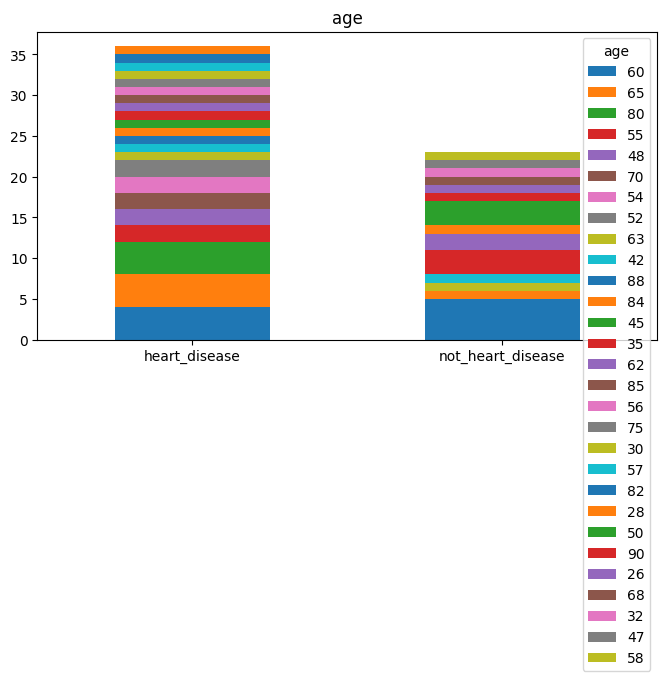

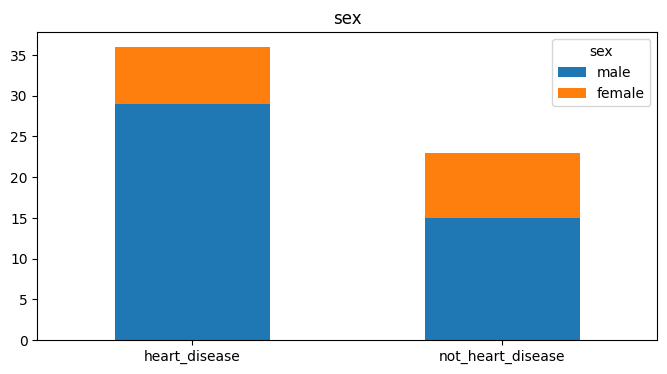

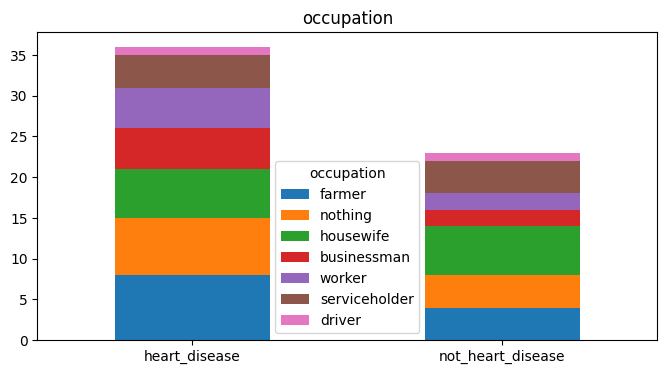

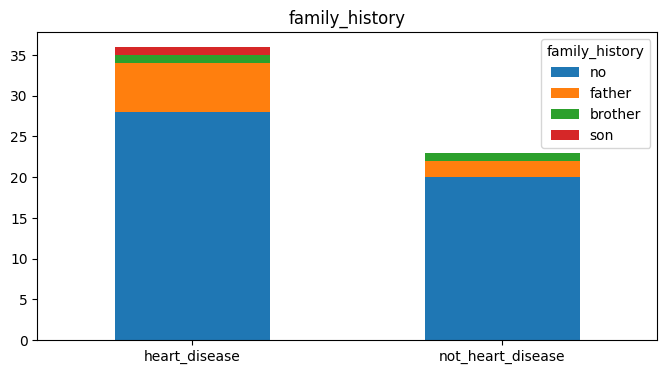

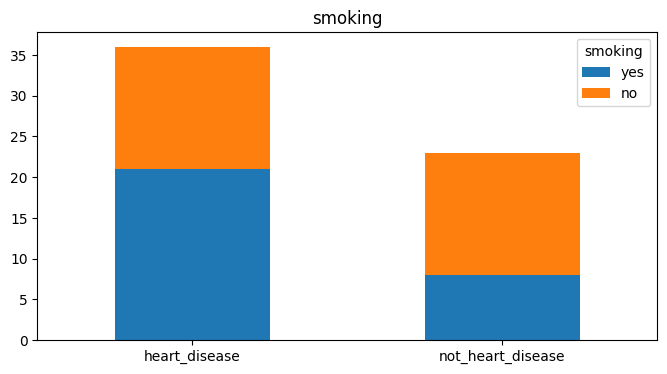

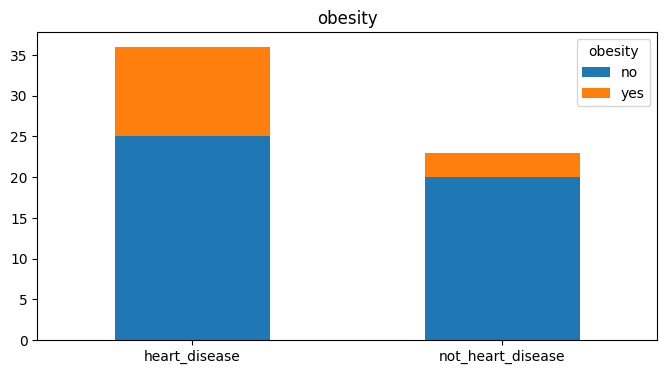

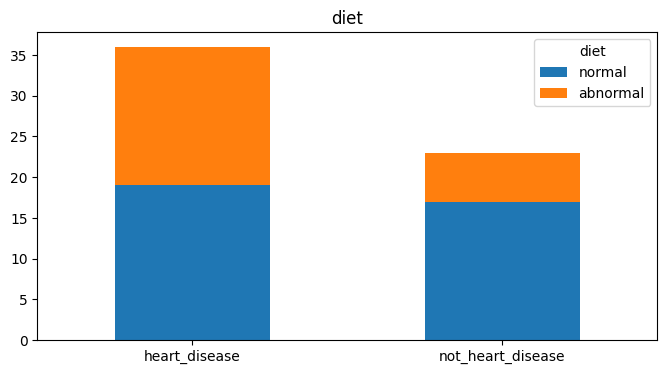

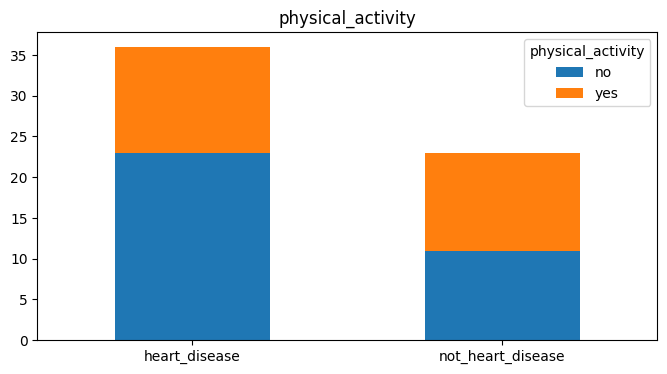

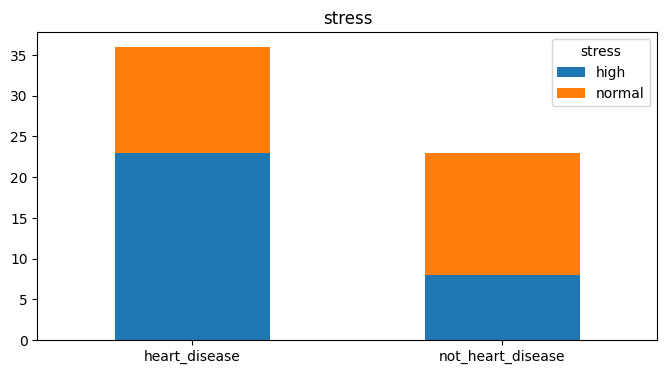

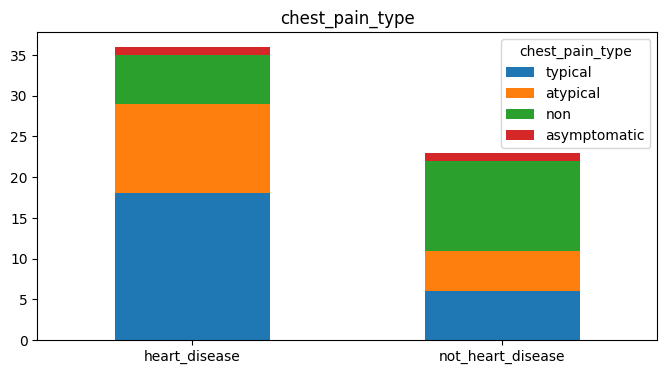

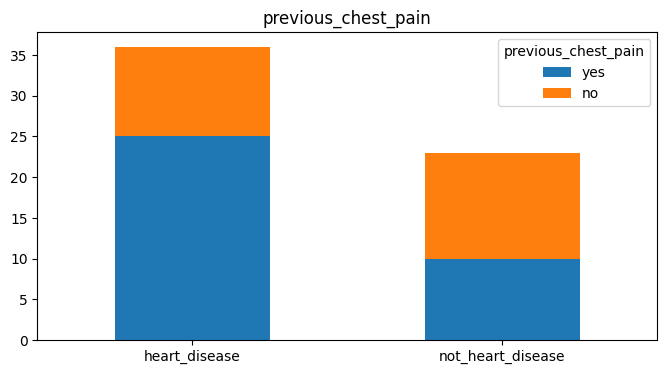

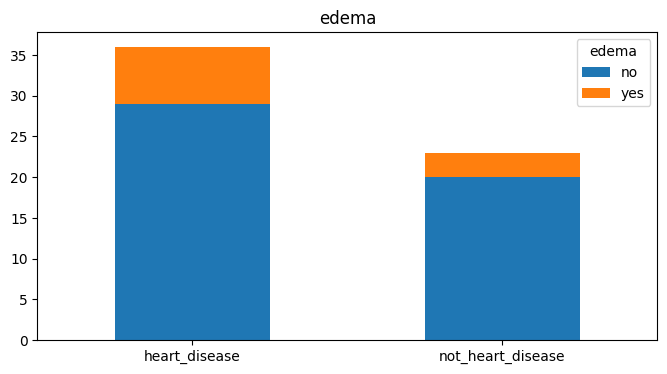

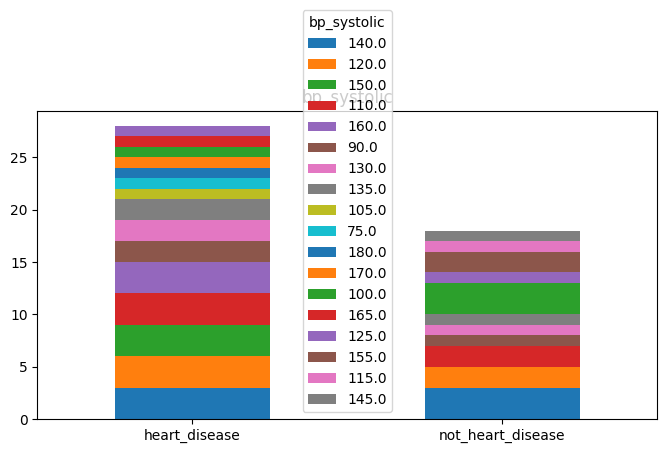

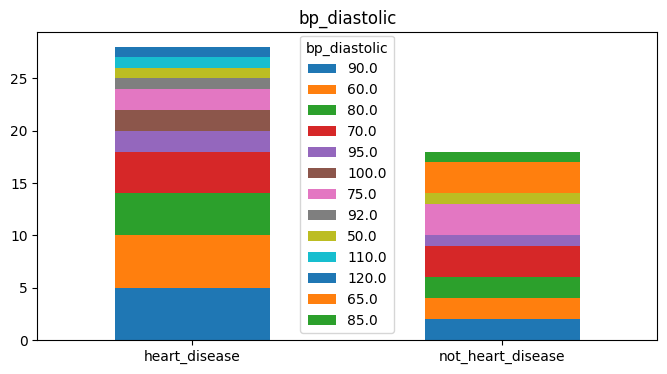

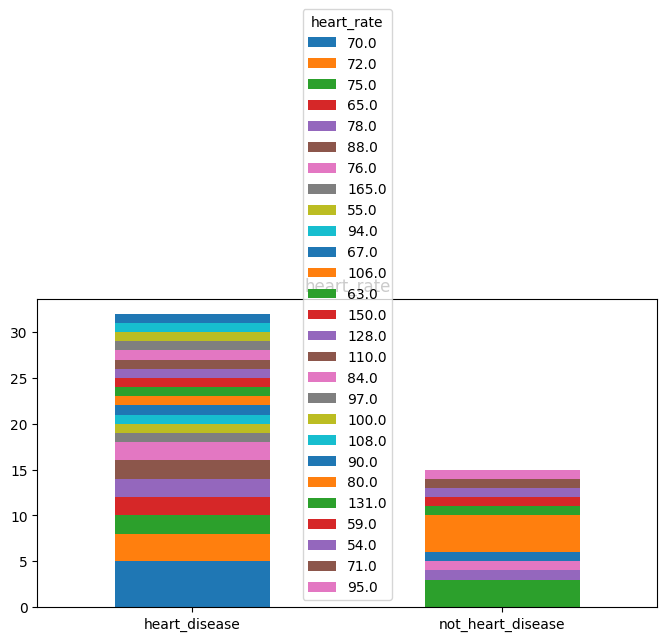

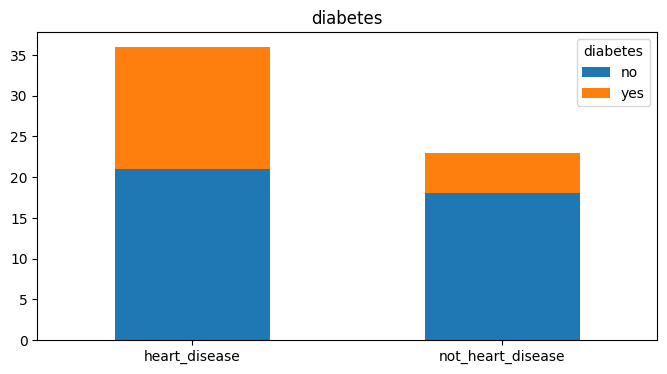

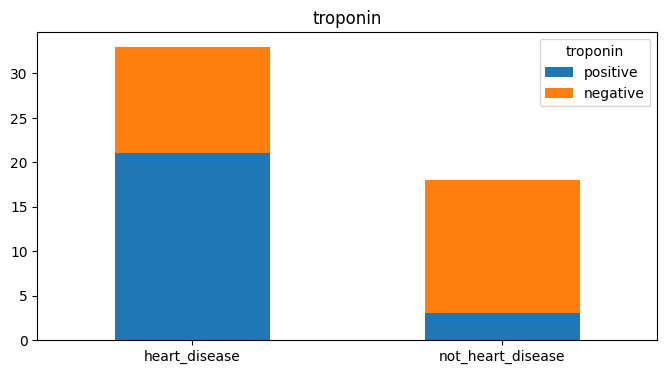

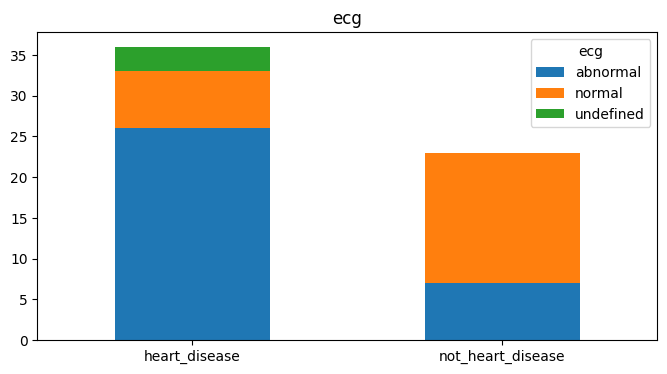

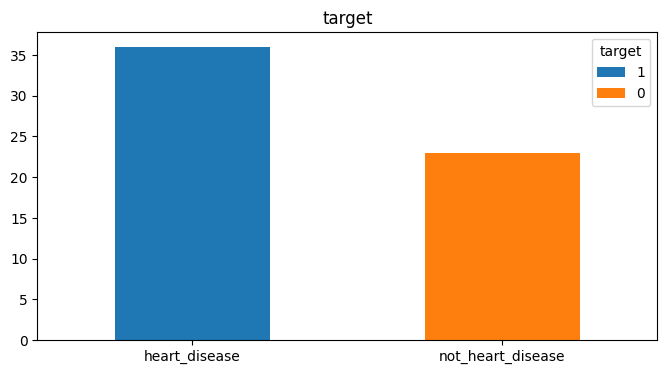

In [6]:
def bar_chart(feature):
    heart_disease = dataset[dataset['target']==1][feature].value_counts()
    not_heart_disease = dataset[dataset['target']==0][feature].value_counts()
    df = pd.DataFrame([heart_disease, not_heart_disease])
    df.index = ['heart_disease','not_heart_disease']
    df.plot(title= feature, kind='bar',stacked=True, figsize=(8,4), rot=0)
    
rcParams['figure.figsize'] = 10, 10
for i in dataset.columns:
   bar_chart(i)

## 2. Pre-Processing/Cleaning

#### handle named value by mapping

In [7]:
sex_mapping = {"male": 0, "female": 1}
dataset['sex'] = dataset['sex'].map(sex_mapping)

occupation_mapping = {"nothing": 0, "farmer": 1, "businessman": 2, "driver": 3, "serviceholder": 4,
       "worker": 5, "housewife": 6, "military": 7, "doctor": 8}
dataset['occupation'] = dataset['occupation'].map(occupation_mapping)

family_history_mapping = {"no": 0, "father": 1, "brother": 2, "son": 3}
dataset['family_history'] = dataset['family_history'].map(family_history_mapping)

smoking_mapping = {"no": 0, "yes": 1}
dataset['smoking'] = dataset['smoking'].map(smoking_mapping)

obesity_mapping = {"no": 0, "yes": 1}
dataset['obesity'] = dataset['obesity'].map(obesity_mapping)

diet_mapping = {"normal": 0, "abnormal": 1}
dataset['diet'] = dataset['diet'].map(diet_mapping)

physical_activity_mapping = {"no": 0, "yes": 1}
dataset['physical_activity'] = dataset['physical_activity'].map(physical_activity_mapping)

stress_mapping = {"normal": 0, "high": 1}
dataset['stress'] = dataset['stress'].map(stress_mapping)

chest_pain_type_mapping = {"typical": 0, "atypical": 1, "asymptomatic": 2, "non": 3}
dataset['chest_pain_type'] = dataset['chest_pain_type'].map(chest_pain_type_mapping)

previous_chest_pain_mapping = {"no": 0, "yes": 1}
dataset['previous_chest_pain'] = dataset['previous_chest_pain'].map(previous_chest_pain_mapping)

edema_mapping = {"no": 0, "yes": 1}
dataset['edema'] = dataset['edema'].map(edema_mapping)

diabetes_mapping = {"no": 0, "yes": 1}
dataset['diabetes'] = dataset['diabetes'].map(diabetes_mapping)

troponin_mapping = {"negative": 0, "positive": 1}
dataset['troponin'] = dataset['troponin'].map(troponin_mapping)

ecg_mapping = {"undefined": 0, "normal": 1, "abnormal": 2}
dataset['ecg'] = dataset['ecg'].map(ecg_mapping)


#### Handle Missing Values

In [8]:
dataset.isnull().sum()

age                     0
sex                     0
occupation              0
family_history          0
smoking                 0
obesity                 0
diet                    0
physical_activity       0
stress                  0
chest_pain_type         0
previous_chest_pain     0
edema                   0
bp_systolic            13
bp_diastolic           13
heart_rate             12
diabetes                0
troponin                8
ecg                     0
target                  0
dtype: int64

<Axes: >

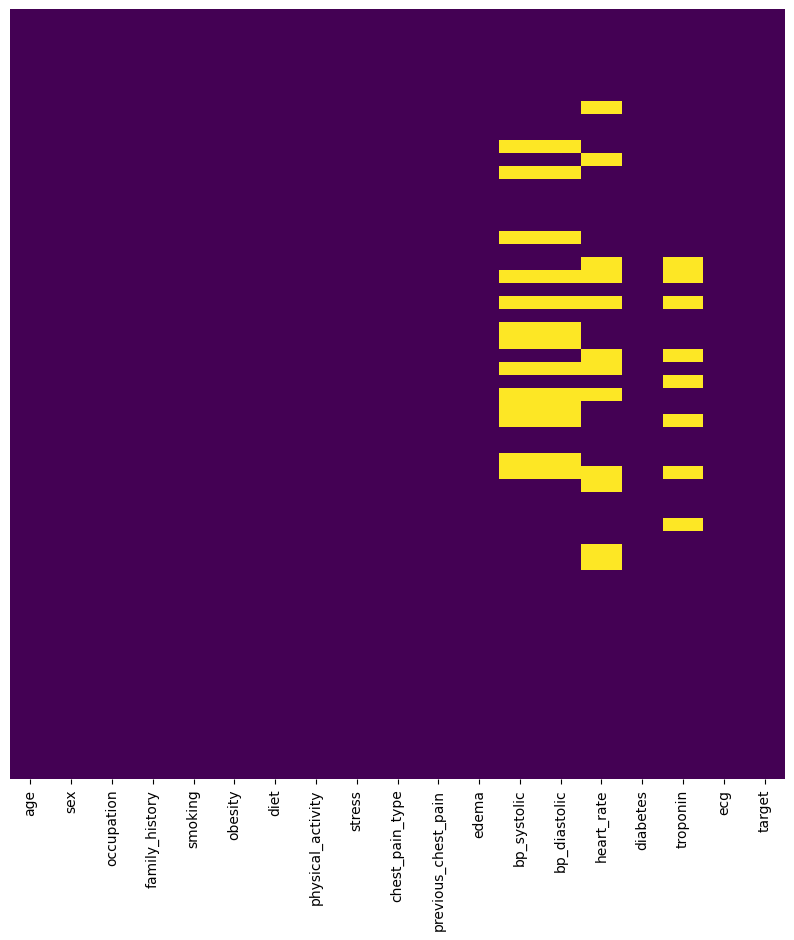

In [9]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [10]:
# Impute missing numerical values with median of the column

dataset["bp_systolic"].fillna(dataset.groupby("sex")["bp_systolic"].transform("median"), inplace=True)
dataset["bp_diastolic"].fillna(dataset.groupby("sex")["bp_diastolic"].transform("median"), inplace=True)
dataset["heart_rate"].fillna(dataset.groupby("sex")["heart_rate"].transform("median"), inplace=True)

In [11]:
# Impute missing numerical values with mode of the column

dataset.troponin.fillna(dataset.troponin.mode()[0], inplace=True)

In [12]:
dataset.isnull().sum()

age                    0
sex                    0
occupation             0
family_history         0
smoking                0
obesity                0
diet                   0
physical_activity      0
stress                 0
chest_pain_type        0
previous_chest_pain    0
edema                  0
bp_systolic            0
bp_diastolic           0
heart_rate             0
diabetes               0
troponin               0
ecg                    0
target                 0
dtype: int64

<Axes: >

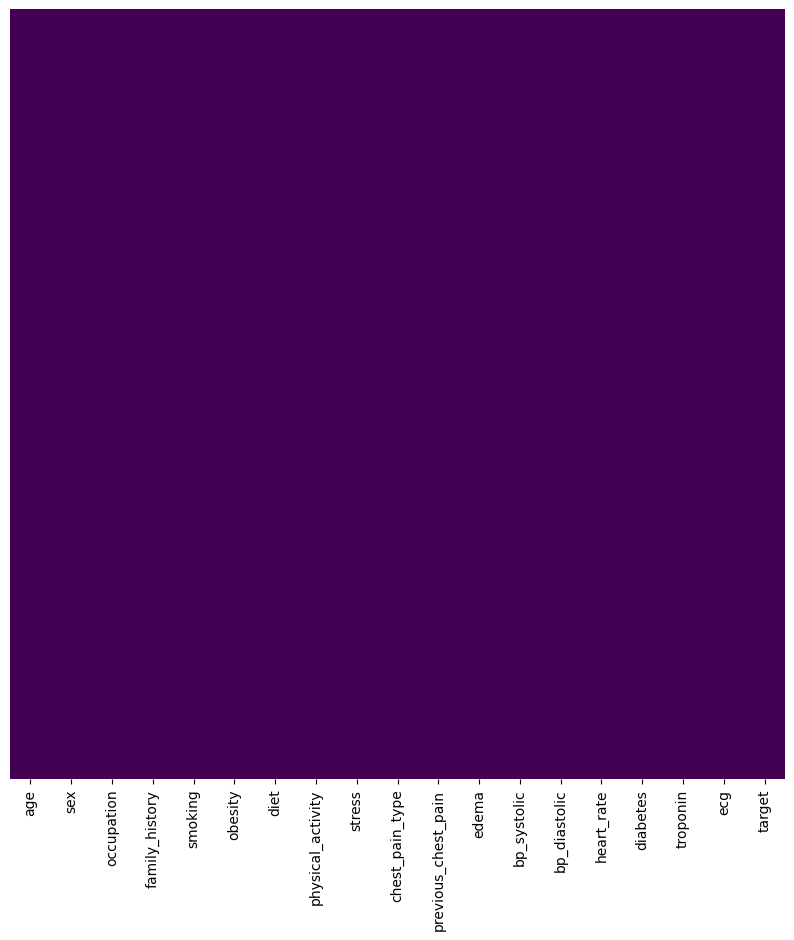

In [13]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## 3. Exploratory Data Analysis (EDA)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'occupation'}>,
        <Axes: title={'center': 'family_history'}>],
       [<Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'obesity'}>,
        <Axes: title={'center': 'diet'}>,
        <Axes: title={'center': 'physical_activity'}>],
       [<Axes: title={'center': 'stress'}>,
        <Axes: title={'center': 'chest_pain_type'}>,
        <Axes: title={'center': 'previous_chest_pain'}>,
        <Axes: title={'center': 'edema'}>],
       [<Axes: title={'center': 'bp_systolic'}>,
        <Axes: title={'center': 'bp_diastolic'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'troponin'}>,
        <Axes: title={'center': 'ecg'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

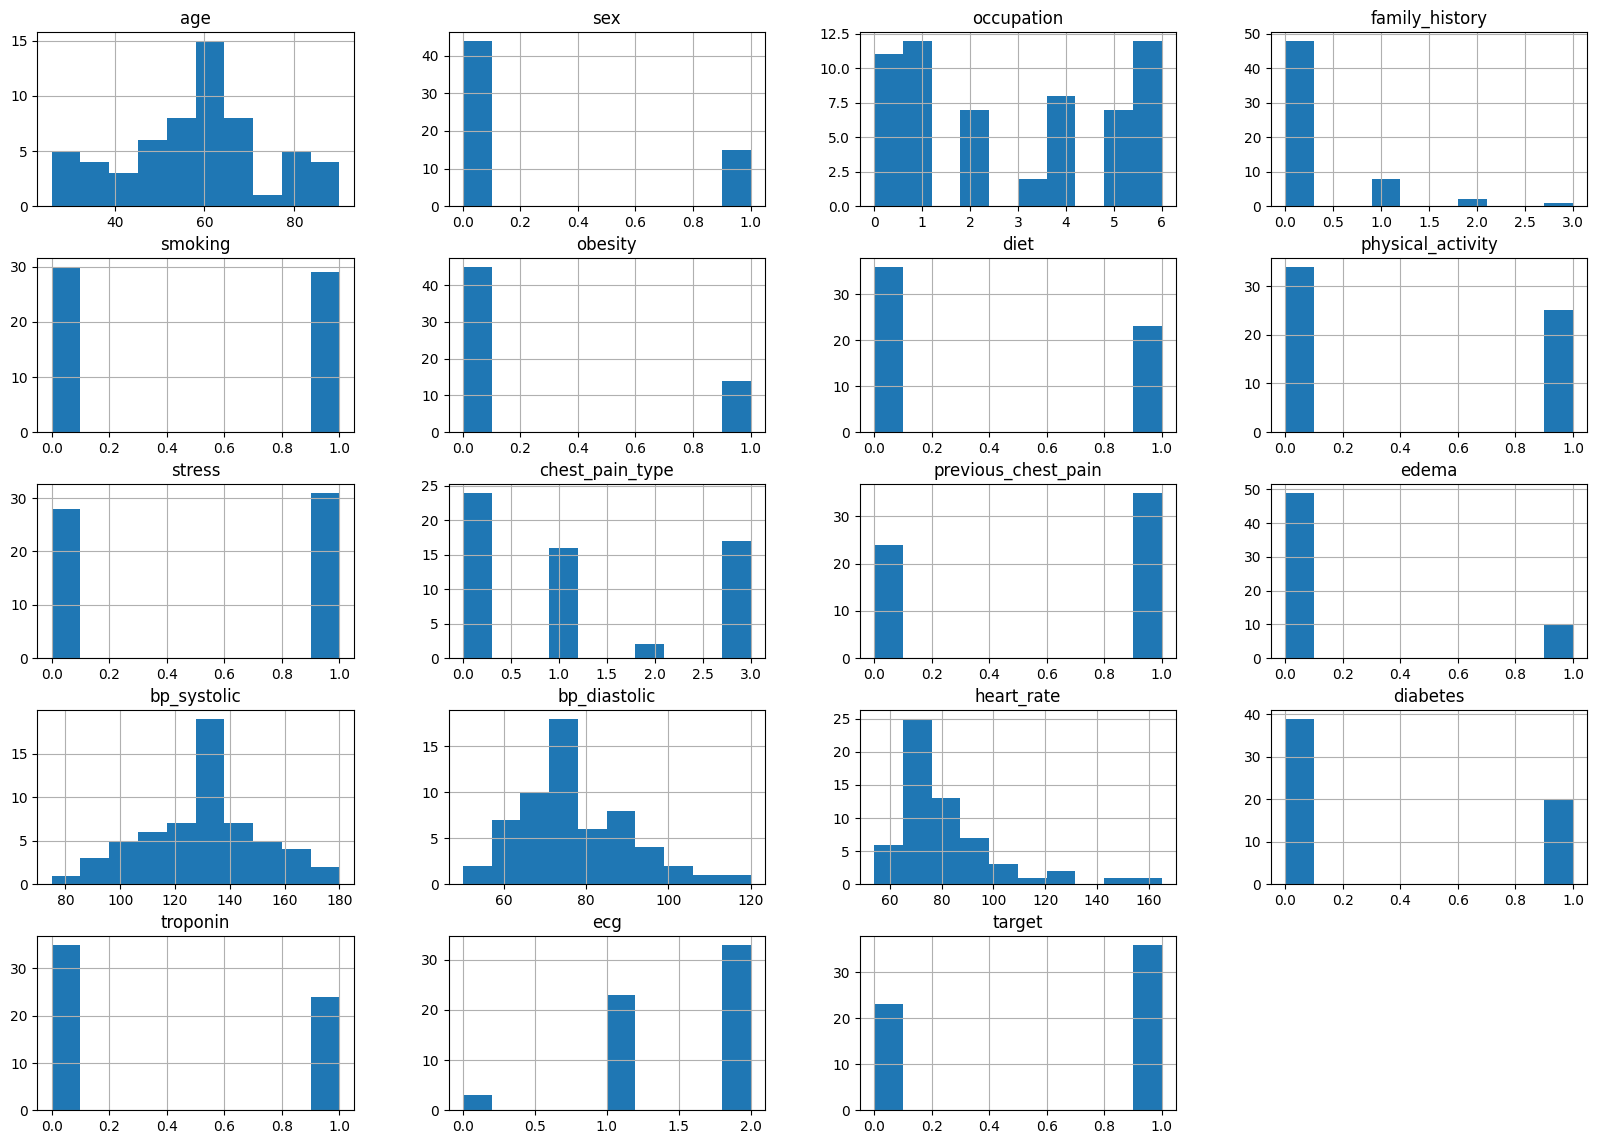

In [14]:
rcParams['figure.figsize'] = 20, 14
dataset.hist()

In [15]:
def facet_grid(feature):
    facet = sns.FacetGrid(dataset, hue="target",aspect=4)
    facet.map(sns.kdeplot, feature, shade= True)
    facet.set(xlim=(0, dataset[feature].max()))
    facet.add_legend() 
    plt.show()

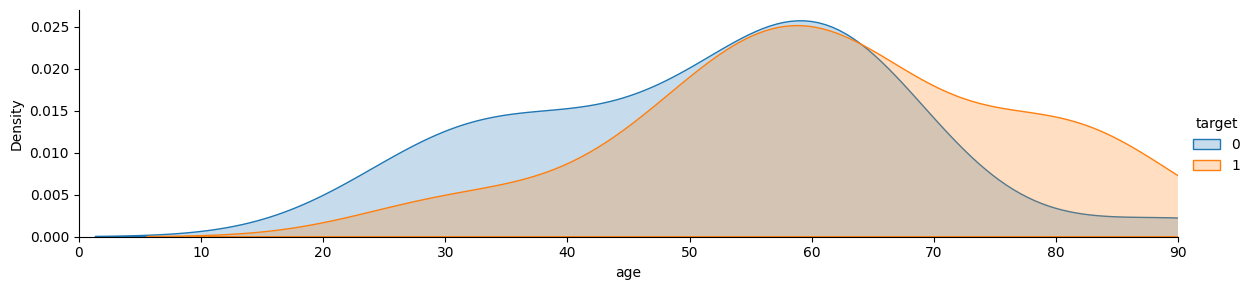

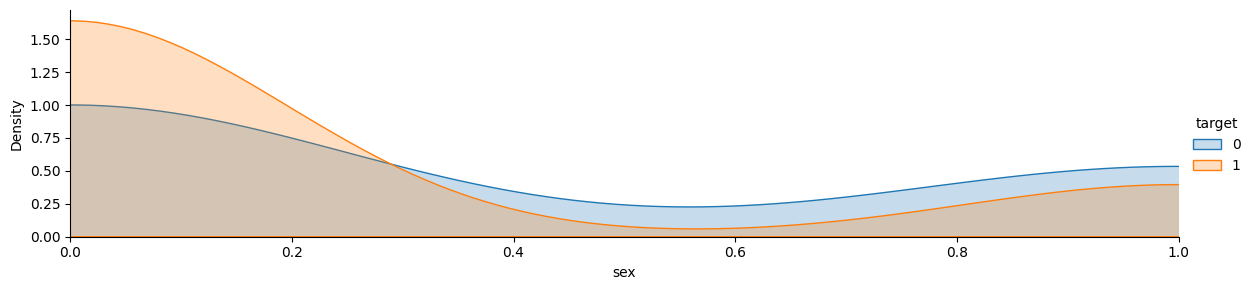

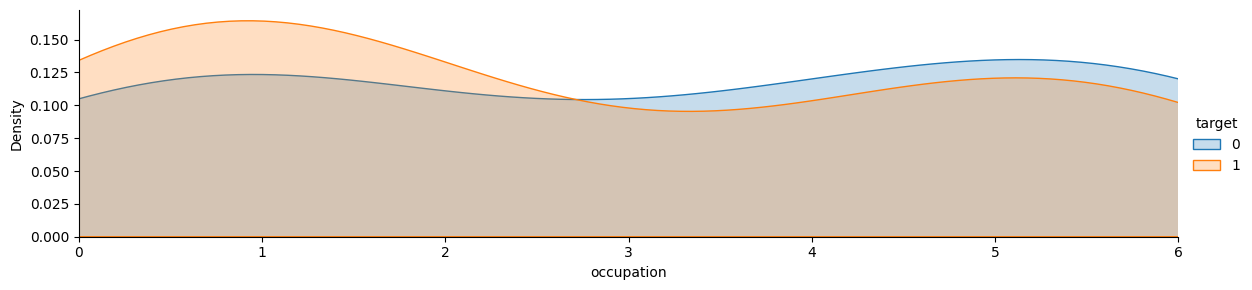

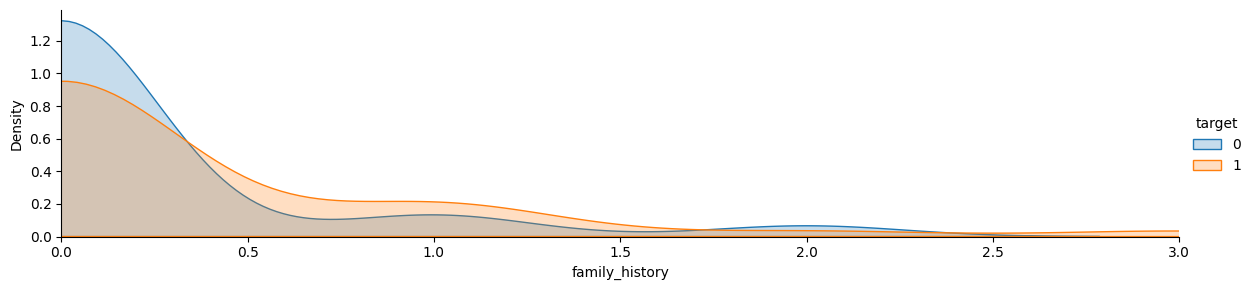

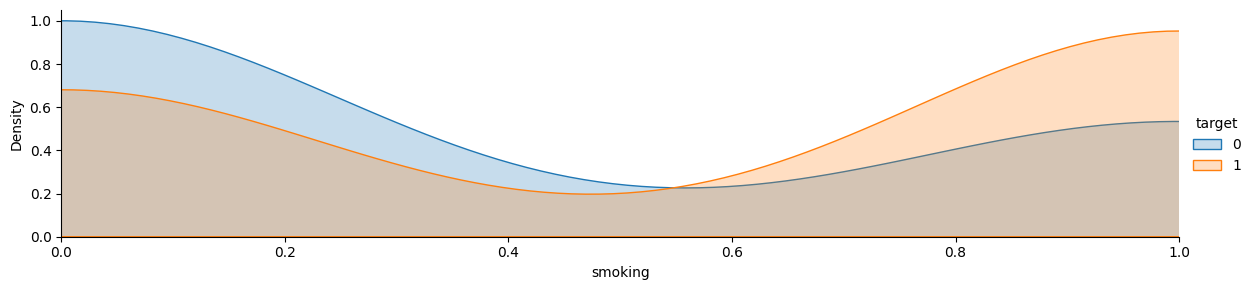

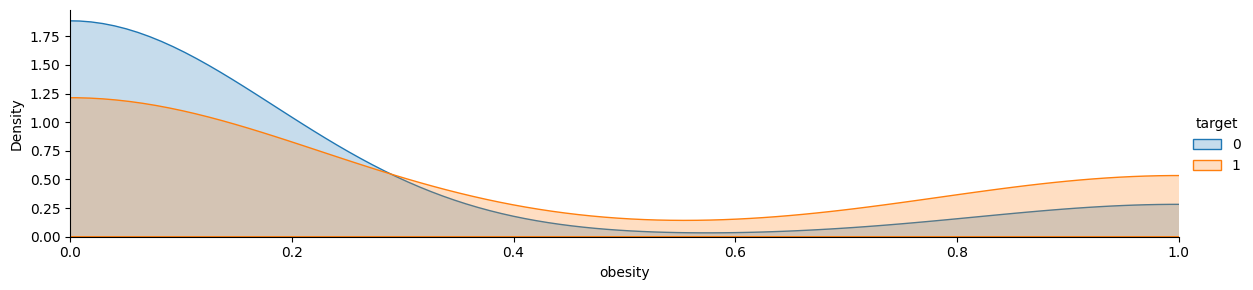

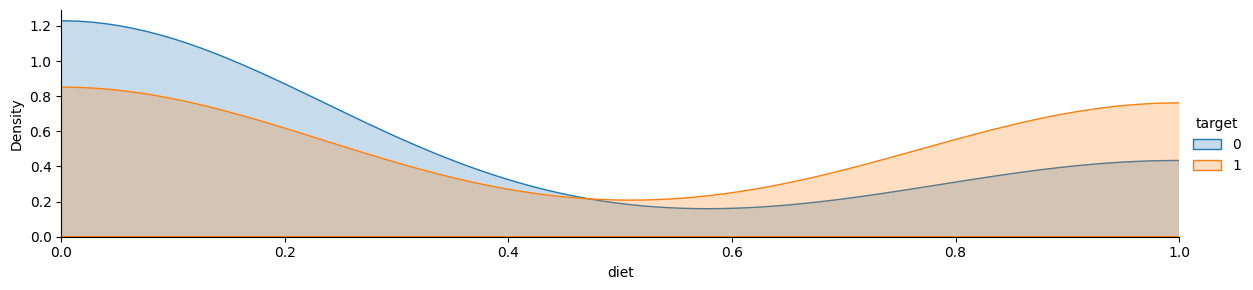

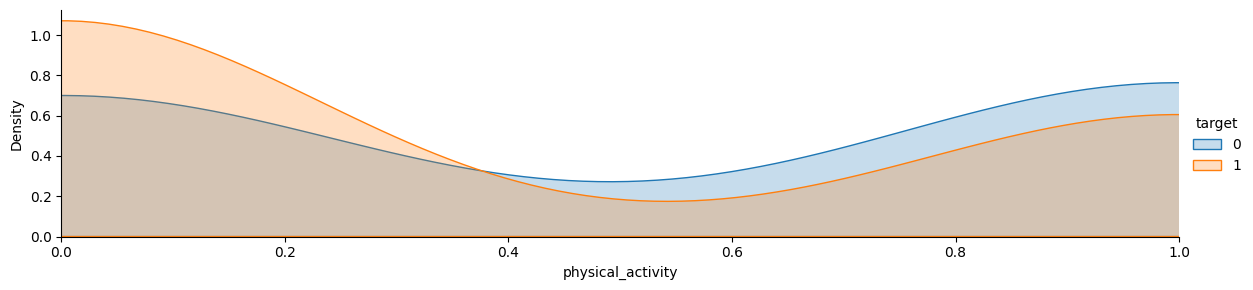

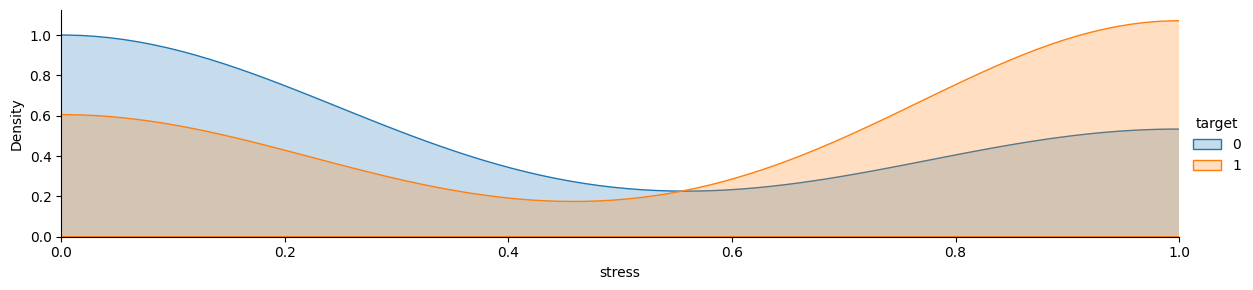

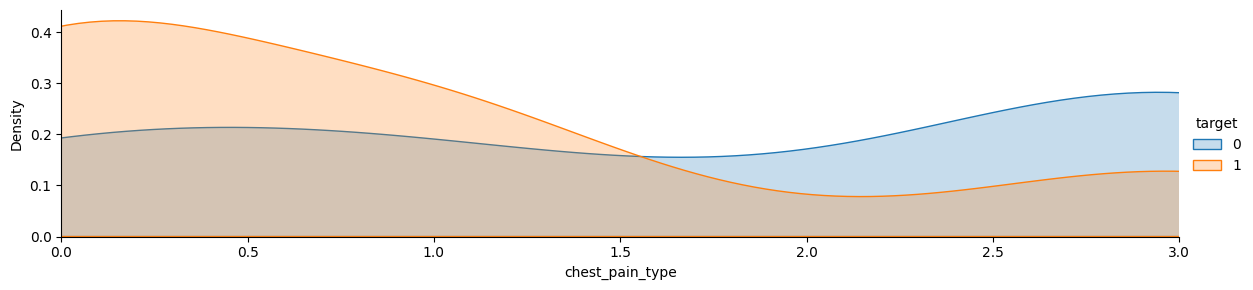

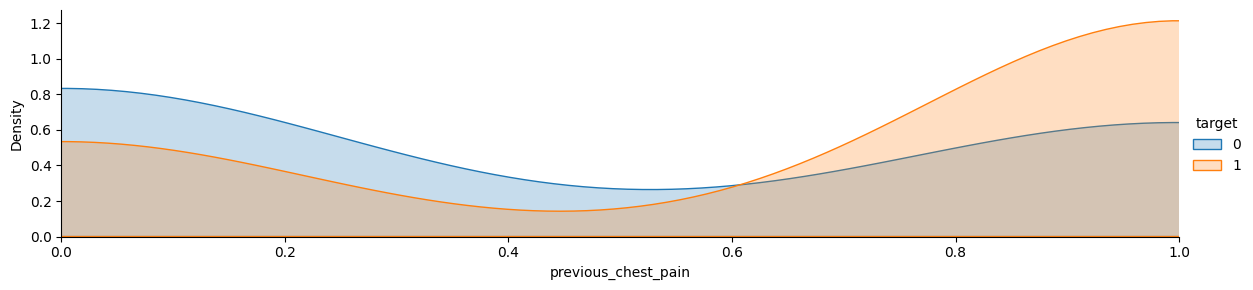

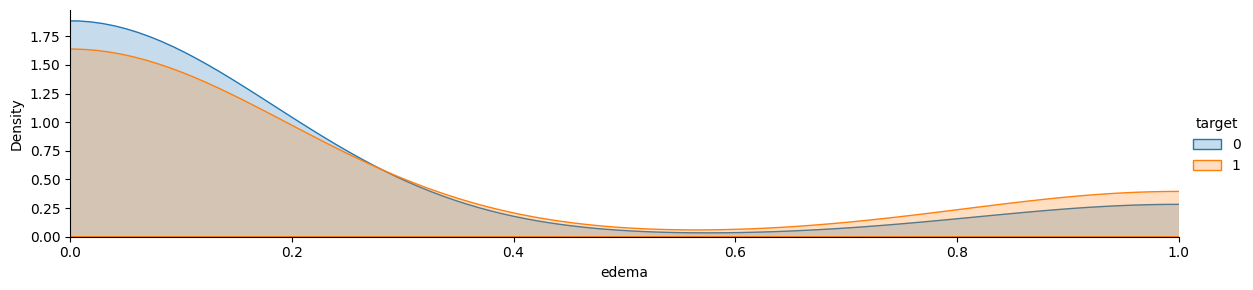

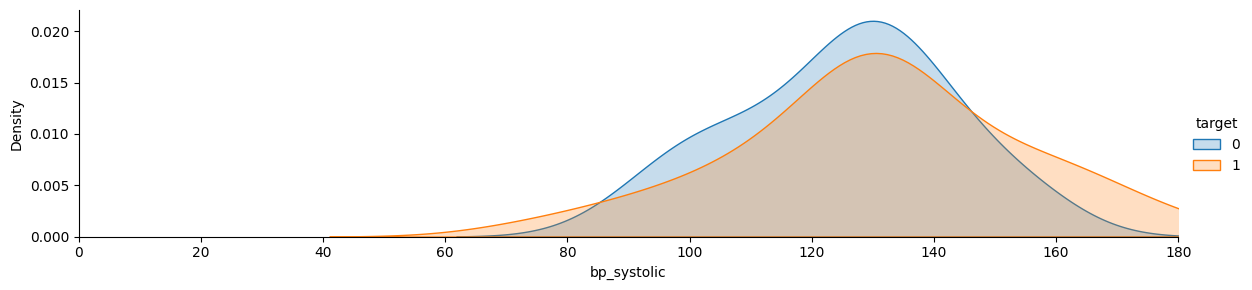

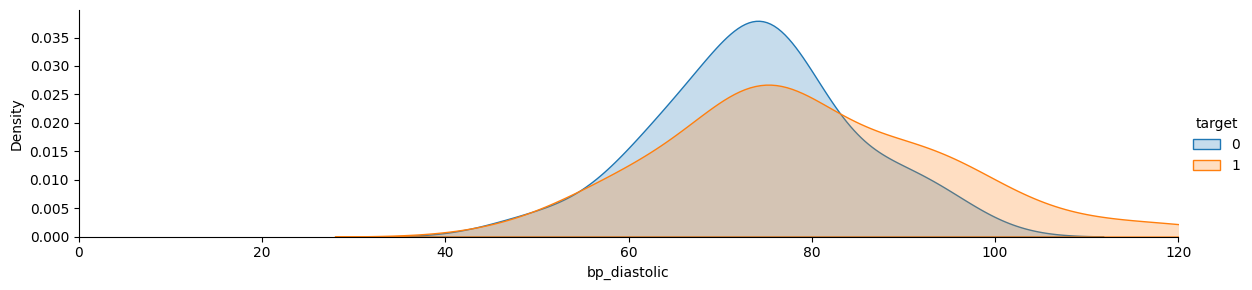

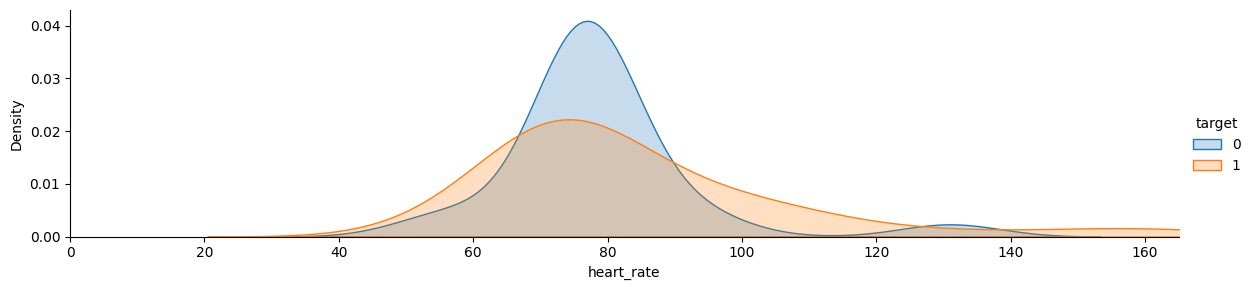

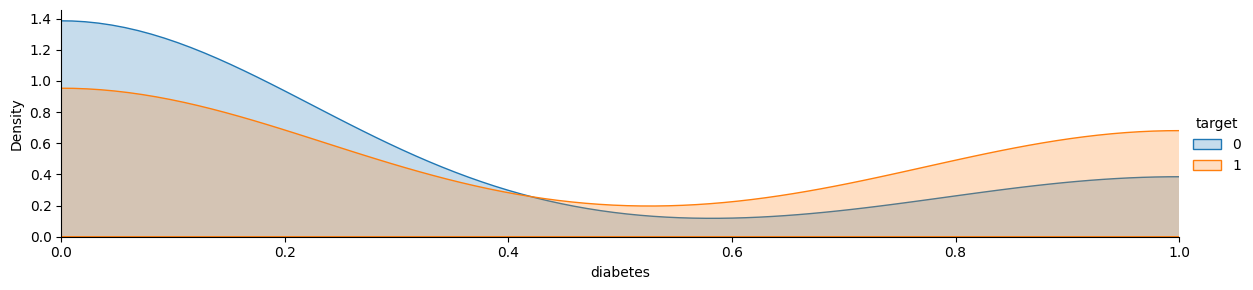

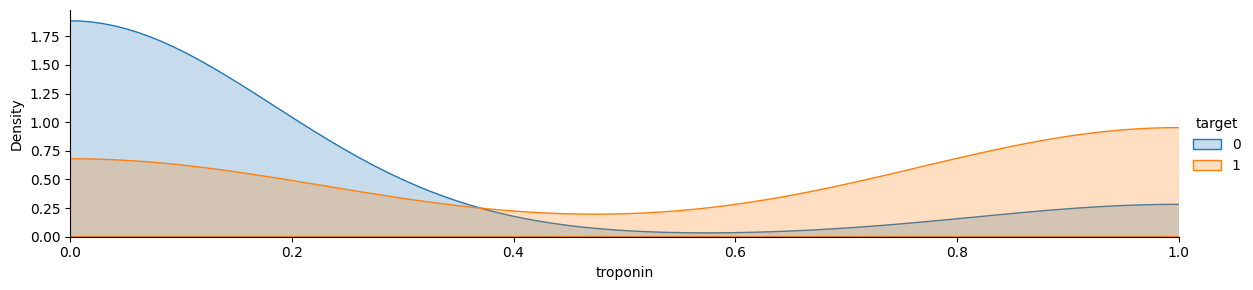

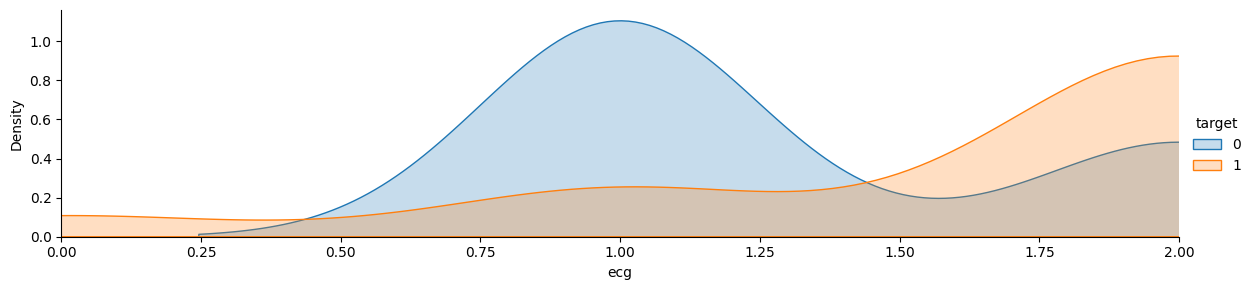

In [64]:
rcParams['figure.figsize'] = 10, 10
for i in dataset.columns:
    if(i!='target'):
        facet_grid(i)

## 4. Feature engineering

#### correlation checking

In [17]:
# correlation between numberic value
datasetNumeric = dataset[['age', 'bp_systolic', 'bp_diastolic', 'heart_rate', 'target']]
datasetNumeric.corr()

,age,bp_systolic,bp_diastolic,heart_rate,target
age,1.000000,0.019994,0.069676,-0.030911,0.288249
bp_systolic,0.019994,1.000000,0.805017,0.150733,0.132768
bp_diastolic,0.069676,0.805017,1.000000,0.208148,0.205186
heart_rate,-0.030911,0.150733,0.208148,1.000000,0.145232
target,0.288249,0.132768,0.205186,0.145232,1.000000


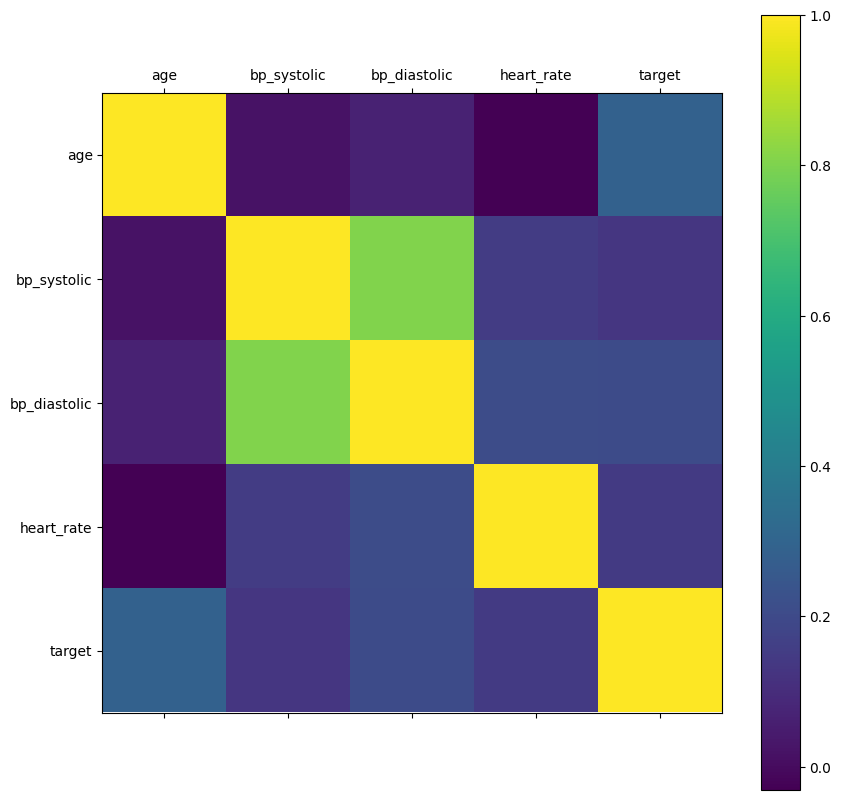

In [18]:
rcParams['figure.figsize'] = 10, 10
plt.matshow(datasetNumeric.corr())
plt.yticks(np.arange(datasetNumeric.shape[1]), datasetNumeric.columns)
plt.xticks(np.arange(datasetNumeric.shape[1]), datasetNumeric.columns)
plt.colorbar()

In [19]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target                 1.000000
troponin               0.449652
chest_pain_type        0.343749
age                    0.288249
stress                 0.284277
ecg                    0.275153
previous_chest_pain    0.257800
smoking                0.229752
diet                   0.211353
diabetes               0.205315
bp_diastolic           0.205186
obesity                0.200762
sex                    0.171797
physical_activity      0.158536
heart_rate             0.145232
bp_systolic            0.132768
family_history         0.107141
occupation             0.098122
edema                  0.083208
Name: target, dtype: float64


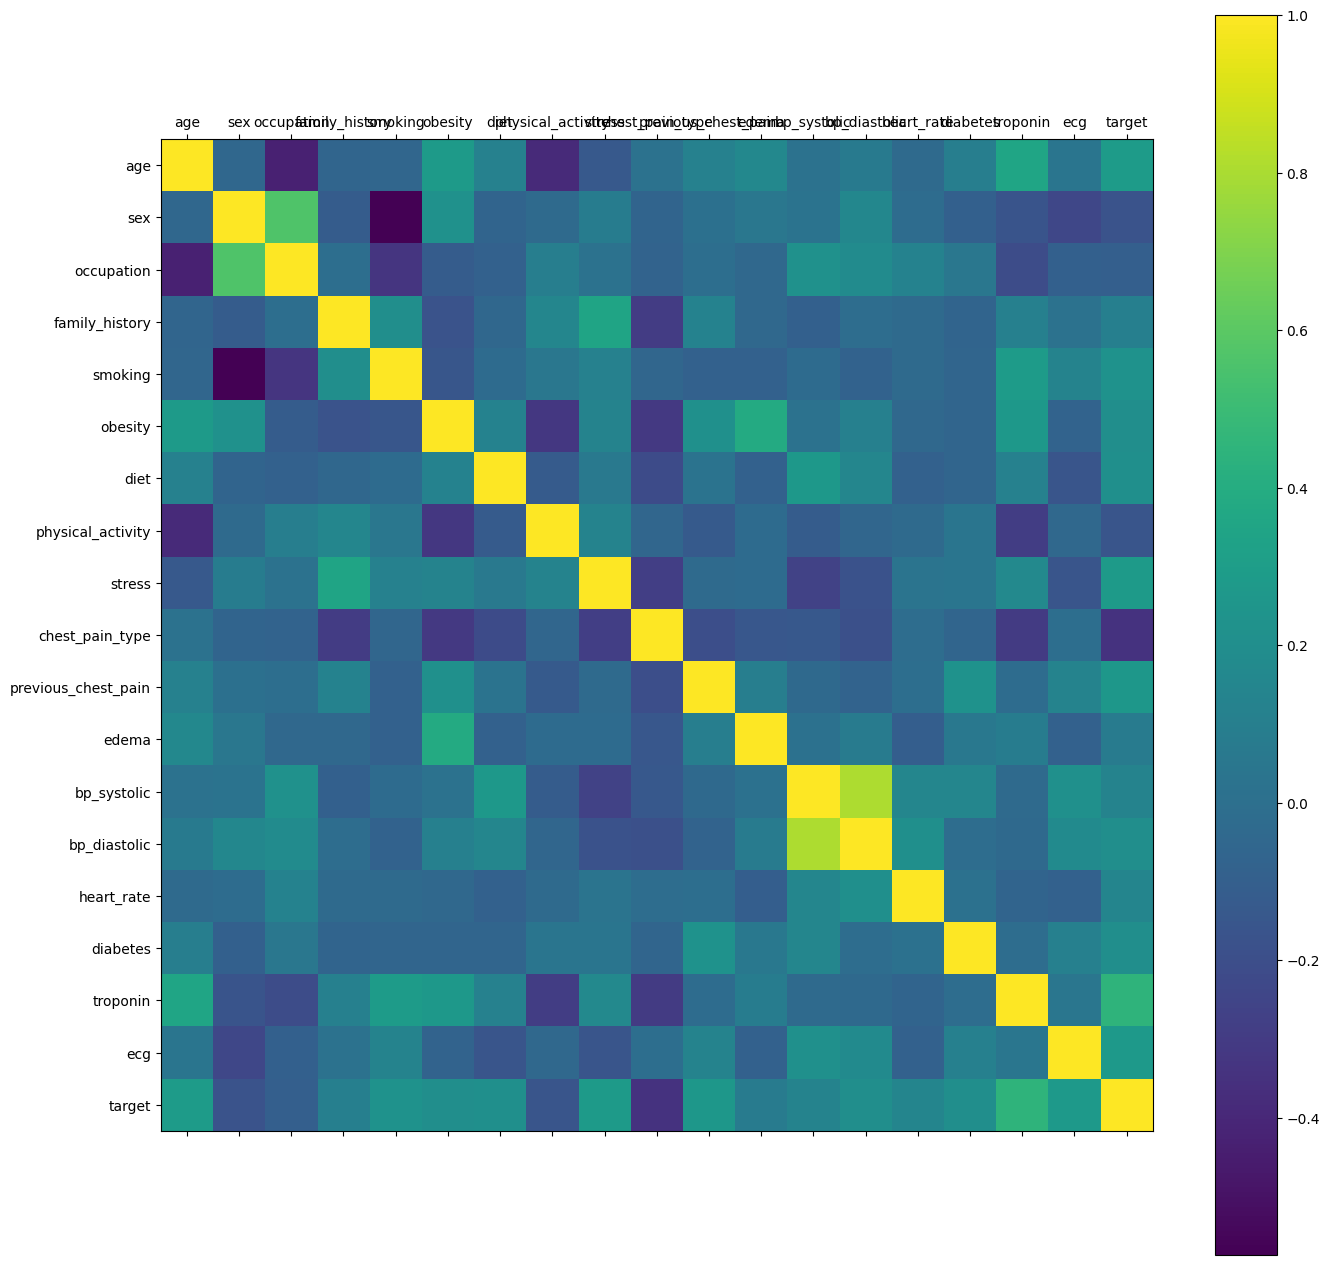

In [20]:
rcParams['figure.figsize'] = 42, 42
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()


<Axes: >

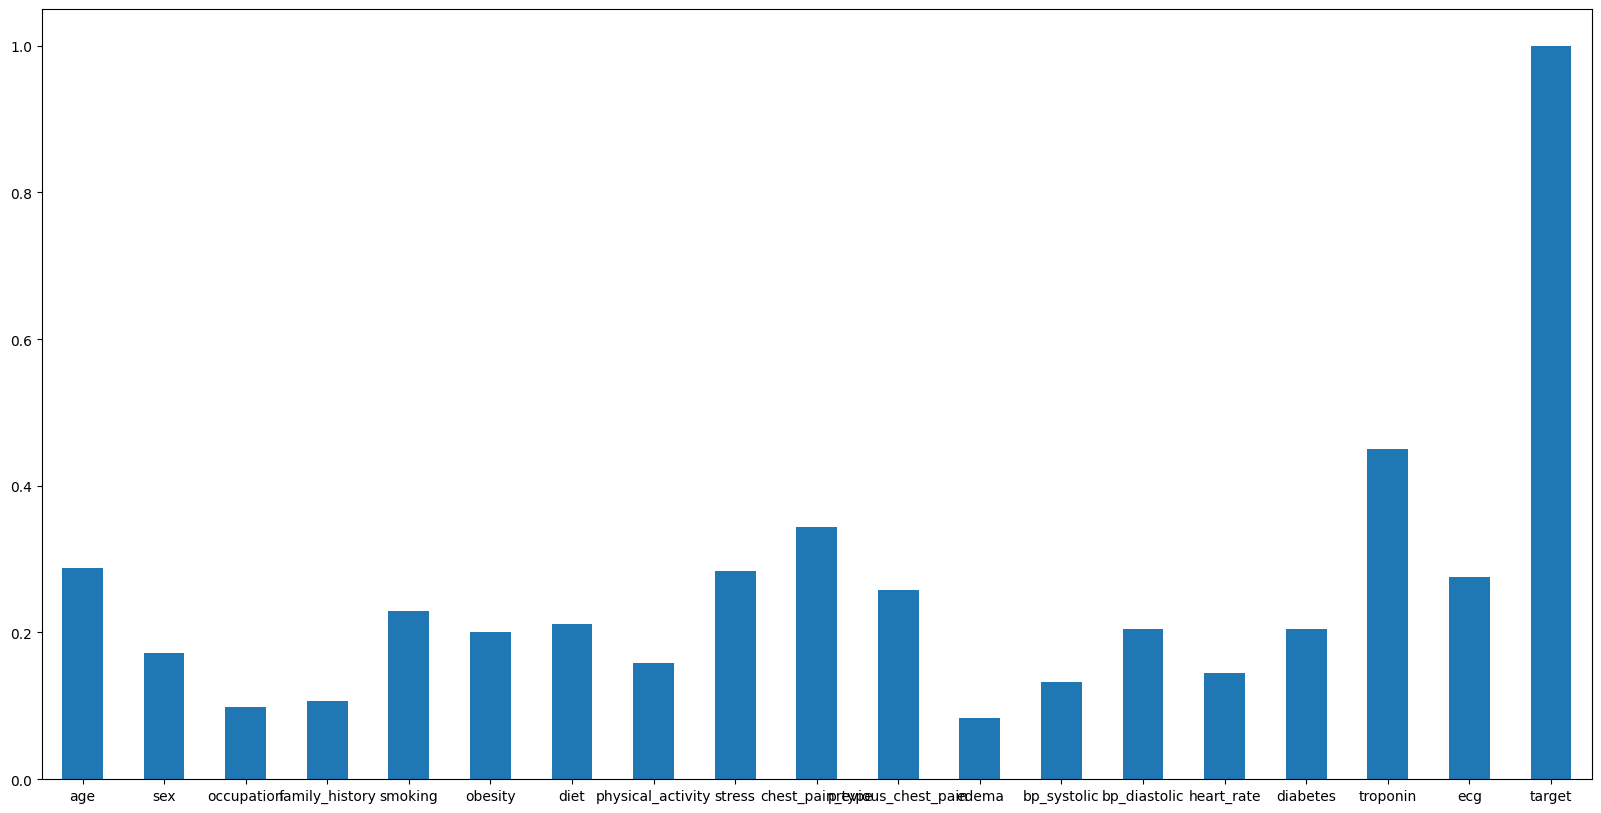

In [21]:
rcParams['figure.figsize'] = 20, 10
dataset.corr()["target"].abs().plot(kind='bar', rot=0)

#### feature selection

In [22]:
feature_selected = ['age','sex', 'smoking','obesity', 'diet', 'physical_activity', 'stress',
                'chest_pain_type' , 'previous_chest_pain', 'bp_diastolic'
                , 'diabetes', 'troponin', 'ecg','target']
data_selected = dataset[feature_selected]

In [23]:
data_selected.shape

(59, 14)

#### convert categorical to dummies values

In [24]:
data_selected = pd.get_dummies(data_selected, columns = ['sex', 'smoking', 'obesity', 'diet', 'physical_activity', 'stress'
                        , 'chest_pain_type', 'previous_chest_pain', 'diabetes', 'troponin', 'ecg'])

#### feature scaling

In [25]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'bp_diastolic']
data_selected[columns_to_scale] = standardScaler.fit_transform(data_selected[columns_to_scale])

In [26]:
data_selected.shape

(59, 28)

## 5. Prediction

#### train test split

In [27]:
predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.33,random_state=0)

In [28]:
predictors_selected = data_selected.drop("target",axis=1)
target_selected = data_selected["target"]

X_train_selected,X_test_selected,y_train_selected,y_test_selected = train_test_split(predictors_selected,target_selected,test_size=0.33,random_state=0)

In [29]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (39, 18)
X_test (20, 18)
y_train (39,)
y_test (20,)


In [30]:
print('X_train_selected', X_train_selected.shape)
print('X_test_selected', X_test_selected.shape)
print('y_train_selected', y_train_selected.shape)
print('y_test_selected', y_test_selected.shape)

X_train_selected (39, 27)
X_test_selected (20, 27)
y_train_selected (39,)
y_test_selected (20,)


#### model fitting

In [31]:
# for k-fold cross validation
k_fold = KFold(n_splits=8, shuffle=True, random_state=0)

#### Logistic Regression

In [32]:
# for dataset
lr = LogisticRegression()

# f1_score_lr_kv = cross_val_score(lr, predictors, target, cv=k_fold, n_jobs=1, scoring='f1_score')
# f1_score_lr_kv = round(np.mean(f1_score_lr_kv)*100, 2)

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

accuracy_lr = round(accuracy_score(y_test, y_pred_lr)*100, 2)
precision_lr = round(precision_score(y_test, y_pred_lr)*100, 2)
recall_lr = round(recall_score(y_test, y_pred_lr)*100, 2)
f1_score_lr = round(f1_score(y_test, y_pred_lr)*100, 2)
roc_auc_lr = round(roc_auc_score(y_test, y_pred_lr)*100, 2)

print("Accuracy score of Logistic Regression: "+str(accuracy_lr)+" %")
print("Precision score of Logistic Regression: "+str(precision_lr)+" %")
print("Recall score of Logistic Regression: "+str(recall_lr)+" %")
print("F1 score of Logistic Regression: "+str(f1_score_lr)+" %")
print("ROC AUC score of Logistic Regression: "+str(f1_score_lr)+" %")

Accuracy score of Logistic Regression: 70.0 %
Precision score of Logistic Regression: 69.23 %
Recall score of Logistic Regression: 81.82 %
F1 score of Logistic Regression: 75.0 %
ROC AUC score of Logistic Regression: 75.0 %


<Axes: >

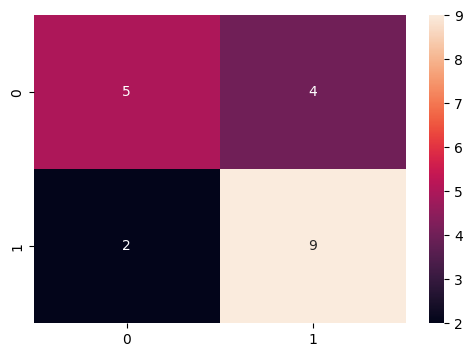

In [33]:
rcParams['figure.figsize'] = 6, 4
matrix_lr= confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix_lr,annot = True, fmt = "d")

In [34]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.69      0.82      0.75        11

    accuracy                           0.70        20
   macro avg       0.70      0.69      0.69        20
weighted avg       0.70      0.70      0.69        20



In [35]:
# for data_selected
lr = LogisticRegression()

# score_lr_selected = cross_val_score(lr, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring='accuracy')
# score_lr_selected = round(np.mean(score_lr_selected)*100, 2)

lr.fit(X_train_selected, y_train_selected)
y_pred_lr_selected = lr.predict(X_test_selected)

accuracy_lr_selected = round(accuracy_score(y_test_selected, y_pred_lr_selected)*100, 2)
precision_lr_selected = round(precision_score(y_test_selected, y_pred_lr_selected)*100, 2)
recall_lr_selected = round(recall_score(y_test_selected, y_pred_lr_selected)*100, 2)
f1_score_lr_selected = round(f1_score(y_test_selected, y_pred_lr_selected)*100, 2)
roc_auc_lr_selected = round(roc_auc_score(y_test_selected, y_pred_lr_selected)*100, 2)

print("Accuracy score of Logistic Regression: "+str(accuracy_lr_selected)+" %")
print("Precision score of Logistic Regression: "+str(precision_lr_selected)+" %")
print("Recall score of Logistic Regression: "+str(recall_lr_selected)+" %")
print("F1 score of Logistic Regression: "+str(f1_score_lr_selected)+" %")
print("ROC AUC score of Logistic Regression: "+str(f1_score_lr_selected)+" %")

Accuracy score of Logistic Regression: 75.0 %
Precision score of Logistic Regression: 75.0 %
Recall score of Logistic Regression: 81.82 %
F1 score of Logistic Regression: 78.26 %
ROC AUC score of Logistic Regression: 78.26 %


<Axes: >

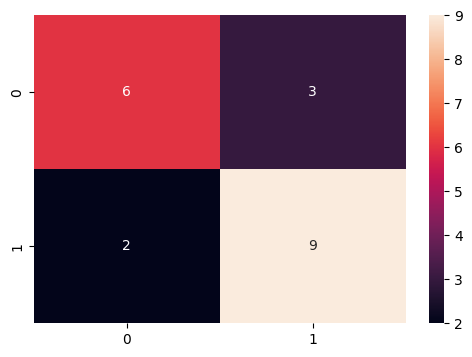

In [36]:
matrix_lr_selected = confusion_matrix(y_test_selected, y_pred_lr_selected)
sns.heatmap(matrix_lr_selected, annot = True, fmt = "d")

In [37]:
print(classification_report(y_test_selected, y_pred_lr_selected))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.75      0.82      0.78        11

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20



#### Naive Bayes

In [38]:
# for dataset
nb = GaussianNB()

# score_nb = cross_val_score(nb, predictors, target, cv=k_fold, n_jobs=1, scoring='accuracy')
# score_nb = round(np.mean(score_nb)*100, 2)

nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

accuracy_nb = round(accuracy_score(y_test, y_pred_nb)*100, 2)
precision_nb = round(precision_score(y_test, y_pred_nb)*100, 2)
recall_nb = round(recall_score(y_test, y_pred_nb)*100, 2)
f1_score_nb = round(f1_score(y_test, y_pred_nb)*100, 2)
roc_auc_nb = round(roc_auc_score(y_test, y_pred_nb)*100, 2)

print("Accuracy score of Naive Bayes: "+str(accuracy_nb)+" %")
print("Precision score of Naive Bayes: "+str(precision_nb)+" %")
print("Recall score of Naive Bayes: "+str(recall_nb)+" %")
print("F1 score of Naive Bayes: "+str(f1_score_nb)+" %")
print("ROC AUC score of Naive Bayes: "+str(f1_score_nb)+" %")

Accuracy score of Naive Bayes: 75.0 %
Precision score of Naive Bayes: 87.5 %
Recall score of Naive Bayes: 63.64 %
F1 score of Naive Bayes: 73.68 %
ROC AUC score of Naive Bayes: 73.68 %


<Axes: >

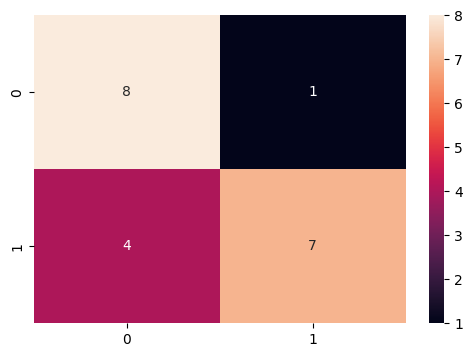

In [39]:
matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matrix_nb, annot = True, fmt = "d")

In [40]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.88      0.64      0.74        11

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20



In [41]:
# for data_selected
nb = GaussianNB()

# score_nb_selected = cross_val_score(nb, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring='accuracy')
# core_nb_selected = round(np.mean(score_nb_selected)*100, 2)

nb.fit(X_train_selected, y_train_selected)
y_pred_nb_selected = nb.predict(X_test_selected)

accuracy_nb_selected = round(accuracy_score(y_test_selected, y_pred_nb_selected)*100, 2)
precision_nb_selected = round(precision_score(y_test_selected, y_pred_nb_selected)*100, 2)
recall_nb_selected = round(recall_score(y_test_selected, y_pred_nb_selected)*100, 2)
f1_score_nb_selected = round(f1_score(y_test_selected, y_pred_nb_selected)*100, 2)
roc_auc_nb_selected = round(roc_auc_score(y_test_selected, y_pred_nb_selected)*100, 2)

print("Accuracy score of Naive Bayes: "+str(accuracy_nb_selected)+" %")
print("Precision score of Naive Bayes: "+str(precision_nb_selected)+" %")
print("Recall score of Naive Bayes: "+str(recall_nb_selected)+" %")
print("F1 score of Naive Bayes: "+str(f1_score_nb_selected)+" %")
print("ROC AUC score of Naive Bayes: "+str(roc_auc_nb_selected)+" %")

Accuracy score of Naive Bayes: 70.0 %
Precision score of Naive Bayes: 77.78 %
Recall score of Naive Bayes: 63.64 %
F1 score of Naive Bayes: 70.0 %
ROC AUC score of Naive Bayes: 70.71 %


<Axes: >

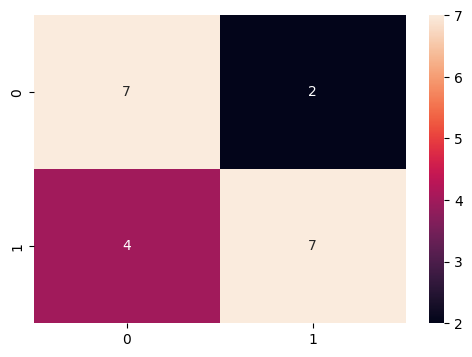

In [42]:
matrix_nb_selected = confusion_matrix(y_test_selected, y_pred_nb_selected)
sns.heatmap(matrix_nb_selected, annot = True, fmt = "d")

In [43]:
print(classification_report(y_test_selected, y_pred_nb_selected))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.78      0.64      0.70        11

    accuracy                           0.70        20
   macro avg       0.71      0.71      0.70        20
weighted avg       0.71      0.70      0.70        20



#### K Neighbors Classifier

In [44]:
# for dataset
knn_scores = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))
score_knn = round(max(knn_scores)*100, 2)
print("The score for K Neighbors Classifier is: "+str(score_knn)+" %")

The score for K Neighbors Classifier is: 75.0 %


In [45]:
# print(classification_report(y_test, y_pred_knn))

In [46]:
# for data_selected
knn_scores_selected = []
for k in range(1,30):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train_selected, y_train_selected)
    knn_scores_selected.append(knn_classifier.score(X_test_selected, y_test_selected))
score_knn_selected = round(max(knn_scores_selected)*100, 2)
print("The score for K Neighbors Classifier is: "+str(score_knn_selected)+" %")

The score for K Neighbors Classifier is: 85.0 %


In [47]:
# print(classification_report(y_test_selected, y_pred_lr_selected))

#### Support Vector Classifier

In [48]:
# for dataset
# kernels = ['linear', 'poly', 'sigmoid', 'rbf']
sv = SVC(kernel='poly')

# score_svm = cross_val_score(nb, predictors, target, cv=k_fold, n_jobs=1, scoring='accuracy')
# score_svm = round(np.mean(score_svm)*100, 2)

sv.fit(X_train, y_train)
y_pred_svm = sv.predict(X_test)

accuracy_svm = round(accuracy_score(y_test, y_pred_svm)*100, 2)
precision_svm = round(precision_score(y_test, y_pred_svm)*100, 2)
recall_svm = round(recall_score(y_test, y_pred_svm)*100, 2)
f1_score_svm = round(f1_score(y_test, y_pred_svm)*100, 2)
roc_auc_svm = round(roc_auc_score(y_test_selected, y_pred_svm)*100, 2)

print("Accuracy score of Linear SVM: "+str(accuracy_svm)+" %")
print("Precision score of Linear SVM: "+str(precision_svm)+" %")
print("Recall score of Linear SVM: "+str(recall_svm)+" %")
print("F1 score of Linear SVM: "+str(f1_score_svm)+" %")
print("ROC AUC score of Linear SVM: "+str(roc_auc_svm)+" %")

Accuracy score of Linear SVM: 55.0 %
Precision score of Linear SVM: 55.0 %
Recall score of Linear SVM: 100.0 %
F1 score of Linear SVM: 70.97 %
ROC AUC score of Linear SVM: 50.0 %


<Axes: >

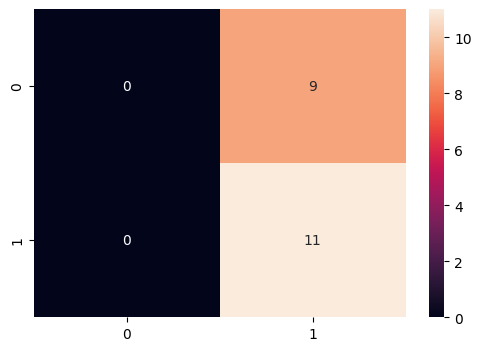

In [49]:
matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(matrix_svm, annot = True, fmt = "d")

In [50]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



In [51]:
# for data_selected
# kernels = ['linear', 'poly', 'sigmoid', 'rbf']
sv = SVC(kernel='rbf')

# score_svm_selected = cross_val_score(nb, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring='accuracy')
# score_svm_selected = round(np.mean(score_svm_selected)*100, 2)

sv.fit(X_train_selected, y_train_selected)
y_pred_svm_selected = sv.predict(X_test_selected)

accuracy_svm_selected = round(accuracy_score(y_test_selected, y_pred_svm_selected)*100, 2)
precision_svm_selected = round(precision_score(y_test_selected, y_pred_svm_selected)*100, 2)
recall_svm_selected = round(recall_score(y_test_selected, y_pred_svm_selected)*100, 2)
f1_score_svm_selected = round(f1_score(y_test_selected, y_pred_svm_selected)*100, 2)
roc_auc_svm_selected = round(roc_auc_score(y_test_selected, y_pred_svm_selected)*100, 2)

print("Accuracy score of Linear SVM: "+str(accuracy_svm_selected)+" %")
print("Precision score of Linear SVM: "+str(precision_svm_selected)+" %")
print("Recall score of Linear SVM: "+str(recall_svm_selected)+" %")
print("F1 score of Linear SVM: "+str(f1_score_svm_selected)+" %")
print("ROC AUC score of Linear SVM: "+str(roc_auc_svm_selected)+" %")

Accuracy score of Linear SVM: 75.0 %
Precision score of Linear SVM: 75.0 %
Recall score of Linear SVM: 81.82 %
F1 score of Linear SVM: 78.26 %
ROC AUC score of Linear SVM: 74.24 %


<Axes: >

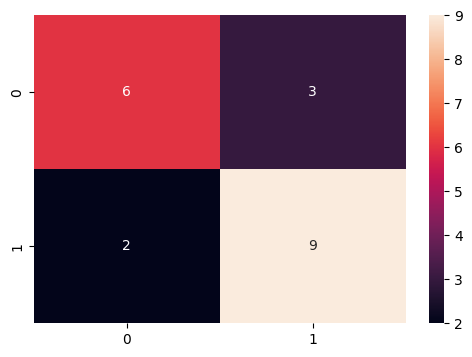

In [52]:
matrix_svm_selected = confusion_matrix(y_test_selected, y_pred_svm_selected)
sns.heatmap(matrix_svm_selected, annot = True, fmt = "d")

In [53]:
print(classification_report(y_test_selected, y_pred_svm_selected))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.75      0.82      0.78        11

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20



#### Decision Tree

In [54]:
#for dataset
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt, y_test)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

# dt = DecisionTreeClassifier()
# score_dt = cross_val_score(dt, predictors, target, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_dt = round(np.mean(score_dt)*100, 2)

accuracy_dt = round(accuracy_score(y_test, y_pred_dt)*100, 2)
precision_dt = round(precision_score(y_test, y_pred_dt)*100, 2)
recall_dt = round(recall_score(y_test, y_pred_dt)*100, 2)
f1_score_dt = round(f1_score(y_test, y_pred_dt)*100, 2)
roc_auc_dt = round(roc_auc_score(y_test_selected, y_pred_dt)*100, 2)

print("Accuracy score of Decision Tree: "+str(accuracy_dt)+" %")
print("Precision score of Decision Tree: "+str(precision_dt)+" %")
print("Recall score of Decision Tree: "+str(recall_dt)+" %")
print("F1 score of Decision Tree: "+str(f1_score_dt)+" %")
print("ROC AUC score of Decision Tree: "+str(roc_auc_dt)+" %")

Accuracy score of Decision Tree: 70.0 %
Precision score of Decision Tree: 69.23 %
Recall score of Decision Tree: 81.82 %
F1 score of Decision Tree: 75.0 %
ROC AUC score of Decision Tree: 68.69 %


<Axes: >

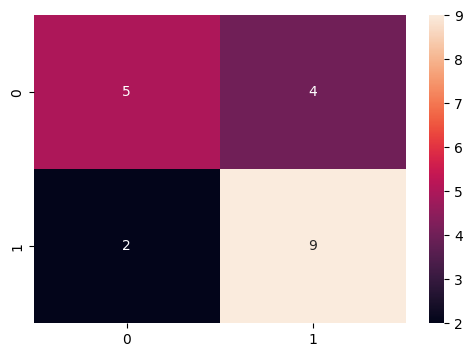

In [55]:
matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(matrix_dt, annot = True, fmt = "d")

In [56]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.69      0.82      0.75        11

    accuracy                           0.70        20
   macro avg       0.70      0.69      0.69        20
weighted avg       0.70      0.70      0.69        20



In [57]:
# data_selected
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_selected, y_train_selected)
    y_pred_dt_selected = dt.predict(X_test_selected)
    current_accuracy = round(accuracy_score(y_pred_dt_selected, y_test_selected)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_selected,y_train_selected)
y_pred_dt_selected = dt.predict(X_test_selected)

# dt = DecisionTreeClassifier()
# score_dt_selected = cross_val_score(dt, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_dt_selected = round(np.mean(score_dt_selected)*100, 2)

accuracy_dt_selected = round(accuracy_score(y_test_selected, y_pred_dt_selected)*100, 2)
precision_dt_selected = round(precision_score(y_test_selected, y_pred_dt_selected)*100, 2)
recall_dt_selected = round(recall_score(y_test_selected, y_pred_dt_selected)*100, 2)
f1_score_dt_selected = round(f1_score(y_test_selected, y_pred_dt_selected)*100, 2)
roc_auc_dt_selected = round(roc_auc_score(y_test_selected, y_pred_dt_selected)*100, 2)

print("Accuracy score of Decision Tree: "+str(accuracy_dt_selected)+" %")
print("Precision score of Decision Tree: "+str(precision_dt_selected)+" %")
print("Recall score of Decision Tree: "+str(recall_dt_selected)+" %")
print("F1 score of Decision Tree: "+str(f1_score_dt_selected)+" %")
print("ROC AUC score of Decision Tree: "+str(roc_auc_dt_selected)+" %")

Accuracy score of Decision Tree: 80.0 %
Precision score of Decision Tree: 81.82 %
Recall score of Decision Tree: 81.82 %
F1 score of Decision Tree: 81.82 %
ROC AUC score of Decision Tree: 79.8 %


<Axes: >

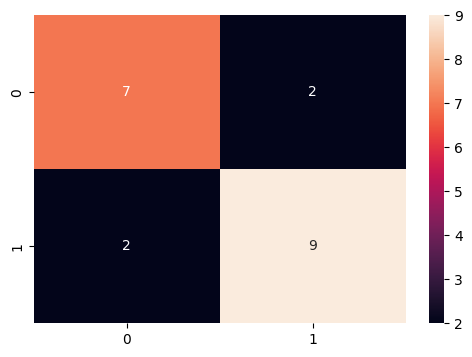

In [58]:
matrix_dt_selected = confusion_matrix(y_test_selected, y_pred_dt_selected)
sns.heatmap(matrix_dt_selected, annot = True, fmt = "d")

In [59]:
print(classification_report(y_test_selected, y_pred_dt_selected))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.82      0.82      0.82        11

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20




#### Random Forest

In [60]:
# for dataset
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state = x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf, y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

# rf = RandomForestClassifier()
# score_rf = cross_val_score(rf, predictors, target, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_rf = round(np.mean(score_rf)*100, 2)

accuracy_rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
precision_rf = round(precision_score(y_test, y_pred_rf)*100, 2)
recall_rf = round(recall_score(y_test, y_pred_rf)*100, 2)
f1_score_rf = round(f1_score(y_test, y_pred_rf)*100, 2)
roc_auc_rf = round(roc_auc_score(y_test_selected, y_pred_rf)*100, 2)

print("Accuracy score of Random Forest: "+str(accuracy_rf)+" %")
print("Precision score of Random Forest: "+str(precision_rf)+" %")
print("Recall score of Random Forest: "+str(recall_rf)+" %")
print("F1 score of Random Forest: "+str(f1_score_rf)+" %")
print("ROC AUC score of Random Forest: "+str(roc_auc_rf)+" %")

Accuracy score of Random Forest: 85.0 %
Precision score of Random Forest: 78.57 %
Recall score of Random Forest: 100.0 %
F1 score of Random Forest: 88.0 %
ROC AUC score of Random Forest: 83.33 %


<Axes: >

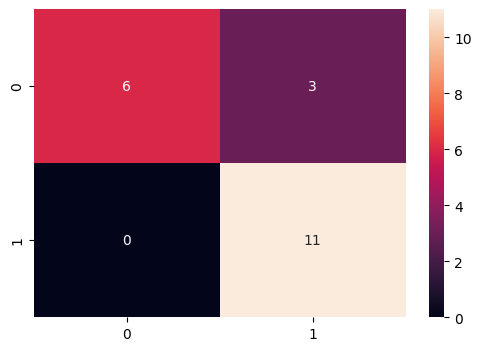

In [61]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix_rf, annot = True, fmt = "d")

In [62]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.79      1.00      0.88        11

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20



In [65]:
# for data_selected
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train_selected,y_train_selected)
    y_pred_rf_selected = rf.predict(X_test_selected)
    current_accuracy = round(accuracy_score(y_pred_rf_selected, y_test_selected)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_selected,y_train_selected)
y_pred_rf_selected = rf.predict(X_test_selected)

# rf = RandomForestClassifier()
# score_rf_selected = cross_val_score(rf, predictors_selected, target_selected, cv=k_fold, n_jobs=1, scoring = 'accuracy')
# score_rf_selected = round(np.mean(score_rf_selected)*100, 2)

accuracy_rf_selected = round(accuracy_score(y_test_selected, y_pred_rf_selected)*100, 2)
precision_rf_selected = round(precision_score(y_test_selected, y_pred_rf_selected)*100, 2)
recall_rf_selected = round(recall_score(y_test_selected, y_pred_rf_selected)*100, 2)
f1_score_rf_selected = round(f1_score(y_test_selected, y_pred_rf_selected)*100, 2)
roc_auc_rf_selected = round(roc_auc_score(y_test_selected, y_pred_rf_selected)*100, 2)

print("Accuracy score of Random Forest: "+str(accuracy_rf_selected)+" %")
print("Precision score of Random Forest: "+str(precision_rf_selected)+" %")
print("Recall score of Random Forest: "+str(recall_rf_selected)+" %")
print("F1 score of Random Forest: "+str(f1_score_rf_selected)+" %")
print("ROC AUC score of Random Forest: "+str(roc_auc_rf_selected)+" %")

Accuracy score of Random Forest: 85.0 %
Precision score of Random Forest: 83.33 %
Recall score of Random Forest: 90.91 %
F1 score of Random Forest: 86.96 %
ROC AUC score of Random Forest: 84.34 %


<Axes: >

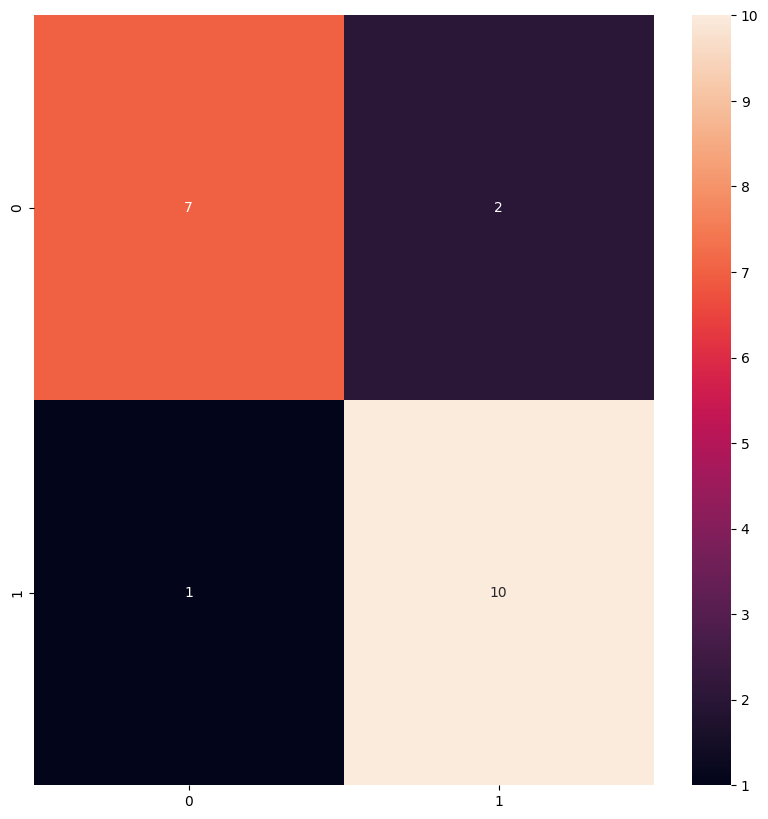

In [66]:
matrix_rf_selected = confusion_matrix(y_test_selected, y_pred_rf_selected)
sns.heatmap(matrix_rf_selected, annot = True, fmt = "d")

In [67]:
print(classification_report(y_test_selected, y_pred_rf_selected))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.83      0.91      0.87        11

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20



#### Multi-Layer Perceptron

In [68]:
# for dataset

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(13,13,13),max_iter=5000)

# score_xgb = cross_val_score(xgb, predictors, target, cv = k_fold, n_jobs = 1, scoring = 'accuracy')
# score_xgb = round(np.mean(score_xgb)*100, 2)

mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)

accuracy_mlp = round(accuracy_score(y_test, y_pred_mlp)*100, 2)
precision_mlp = round(precision_score(y_test, y_pred_mlp)*100, 2)
recall_mlp = round(recall_score(y_test, y_pred_mlp)*100, 2)
f1_score_mlp = round(f1_score(y_test, y_pred_mlp)*100, 2)
roc_auc_mlp = round(roc_auc_score(y_test_selected, y_pred_mlp)*100, 2)

print("Accuracy score of Multi-Layer Perceptron: "+str(accuracy_mlp)+" %")
print("Precision score of Multi-Layer Perceptron: "+str(precision_mlp)+" %")
print("Recall score of Multi-Layer Perceptron: "+str(recall_mlp)+" %")
print("F1 score of Multi-Layer Perceptron: "+str(f1_score_mlp)+" %")
print("ROC AUC score of Multi-Layer Perceptron: "+str(roc_auc_mlp)+" %")

Accuracy score of Multi-Layer Perceptron: 60.0 %
Precision score of Multi-Layer Perceptron: 61.54 %
Recall score of Multi-Layer Perceptron: 72.73 %
F1 score of Multi-Layer Perceptron: 66.67 %
ROC AUC score of Multi-Layer Perceptron: 58.59 %


<Axes: >

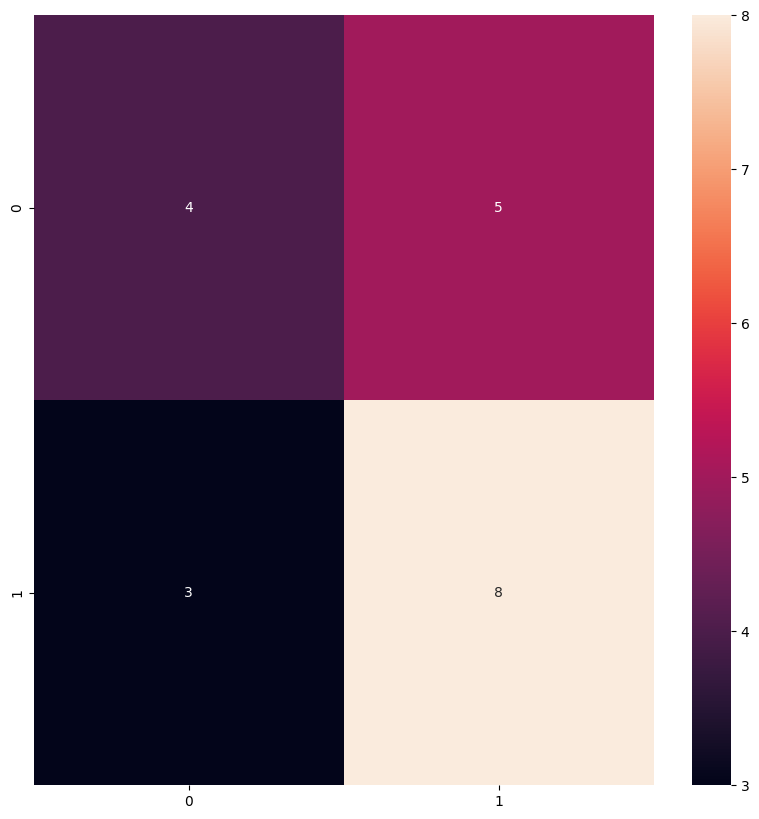

In [69]:
matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(matrix_mlp, annot = True, fmt = "d")

In [70]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.62      0.73      0.67        11

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



In [71]:
# for data_selected

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(13,13,13),max_iter=5000)

# score_xgb = cross_val_score(xgb, predictors, target, cv = k_fold, n_jobs = 1, scoring = 'accuracy')
# score_xgb = round(np.mean(score_xgb)*100, 2)

mlp.fit(X_train_selected,y_train_selected)
y_pred_mlp_selected = mlp.predict(X_test_selected)

accuracy_mlp_selected = round(accuracy_score(y_test_selected, y_pred_mlp_selected)*100, 2)
precision_mlp_selected = round(precision_score(y_test_selected, y_pred_mlp_selected)*100, 2)
recall_mlp_selected = round(recall_score(y_test_selected, y_pred_mlp_selected)*100, 2)
f1_score_mlp_selected = round(f1_score(y_test_selected, y_pred_mlp_selected)*100, 2)
roc_auc_mlp_selected = round(roc_auc_score(y_test_selected, y_pred_mlp_selected)*100, 2)

print("Accuracy score of Multi-Layer Perceptron: "+str(accuracy_mlp_selected)+" %")
print("Precision score of Multi-Layer Perceptron: "+str(precision_mlp_selected)+" %")
print("Recall score of Multi-Layer Perceptron: "+str(recall_mlp_selected)+" %")
print("F1 score of Multi-Layer Perceptron: "+str(f1_score_mlp_selected)+" %")
print("ROC AUC score of Multi-Layer Perceptron: "+str(roc_auc_mlp_selected)+" %")

Accuracy score of Multi-Layer Perceptron: 65.0 %
Precision score of Multi-Layer Perceptron: 70.0 %
Recall score of Multi-Layer Perceptron: 63.64 %
F1 score of Multi-Layer Perceptron: 66.67 %
ROC AUC score of Multi-Layer Perceptron: 65.15 %


<Axes: >

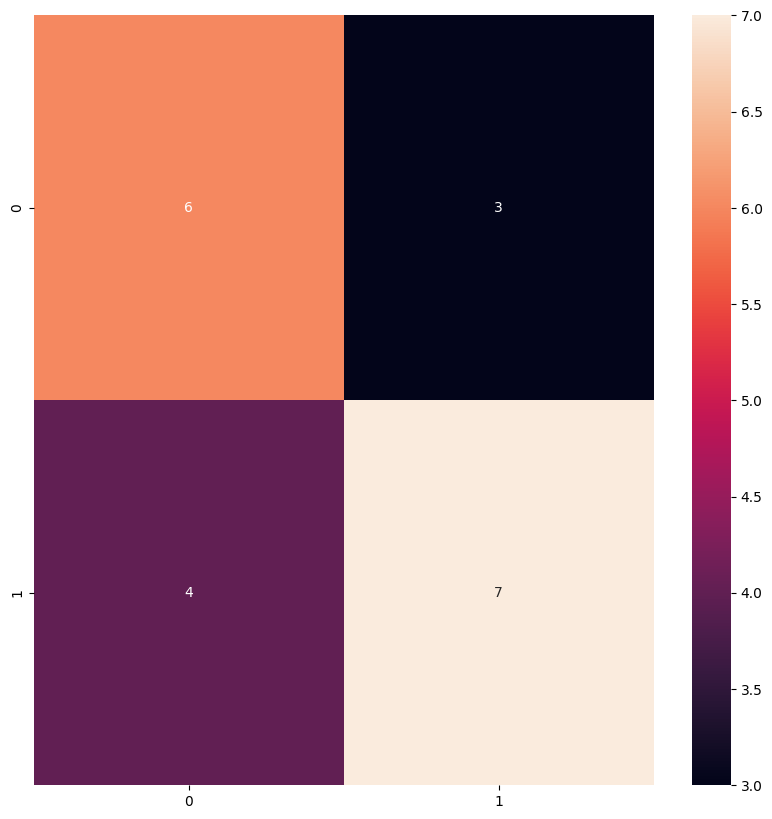

In [72]:
matrix_mlp_selected = confusion_matrix(y_test_selected, y_pred_mlp_selected)
sns.heatmap(matrix_mlp_selected, annot = True, fmt = "d")

In [73]:
print(classification_report(y_test_selected, y_pred_mlp_selected))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.70      0.64      0.67        11

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



#### Scores

In [74]:
# for dataset
accuracys = [accuracy_lr, accuracy_nb, score_knn, accuracy_svm, accuracy_dt, accuracy_rf, accuracy_mlp]
algorithms = ["Logistic Regression","Naive Bayes", "K Neighbors","Support Vector Machine","Decision Tree","Random Forest", "Multi-Layer Perceptron"]    

for i in range(len(algorithms)):
    print("Accuracy score achieved using "+algorithms[i]+" is: "+str(accuracys[i])+" %")

Accuracy score achieved using Logistic Regression is: 70.0 %
Accuracy score achieved using Naive Bayes is: 75.0 %
Accuracy score achieved using K Neighbors is: 75.0 %
Accuracy score achieved using Support Vector Machine is: 55.0 %
Accuracy score achieved using Decision Tree is: 70.0 %
Accuracy score achieved using Random Forest is: 85.0 %
Accuracy score achieved using Multi-Layer Perceptron is: 60.0 %


<Axes: title={'center': 'For Dataset'}, xlabel='Algorithms', ylabel='Accuracy score'>

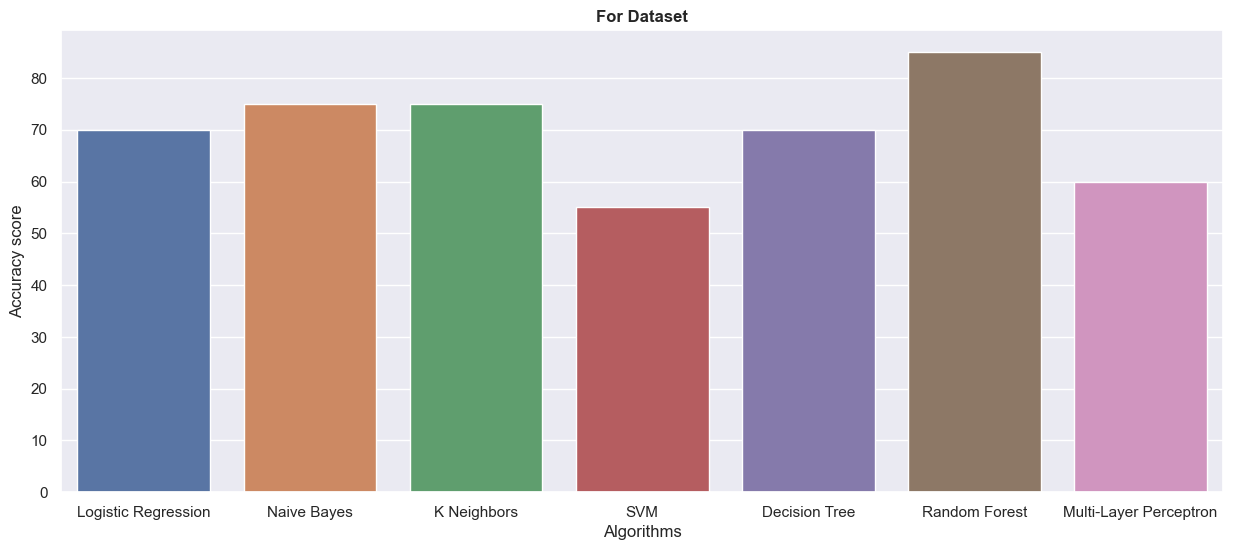

In [82]:
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title('For Dataset', fontweight='bold')
sns.barplot(x=algorithms,y=accuracys)

In [83]:
# for data_selected
accuracys_selected = [accuracy_lr_selected, accuracy_nb_selected, score_knn, accuracy_svm_selected, accuracy_dt_selected, accuracy_rf_selected, accuracy_mlp_selected]
algorithms = ["Logistic Regression","Naive Bayes", "K Neighbors","Support Vector Machine","Decision Tree","Random Forest", "Multi-Layer Perceptron"]    

for i in range(len(algorithms)):
    print("Accuracy accuracy achieved using "+algorithms[i]+" is: "+str(accuracys_selected[i])+" %")

Accuracy accuracy achieved using Logistic Regression is: 75.0 %
Accuracy accuracy achieved using Naive Bayes is: 70.0 %
Accuracy accuracy achieved using K Neighbors is: 75.0 %
Accuracy accuracy achieved using Support Vector Machine is: 75.0 %
Accuracy accuracy achieved using Decision Tree is: 80.0 %
Accuracy accuracy achieved using Random Forest is: 85.0 %
Accuracy accuracy achieved using Multi-Layer Perceptron is: 65.0 %


<Axes: title={'center': 'For Data Selected'}, xlabel='Algorithms', ylabel='Accuracy score'>

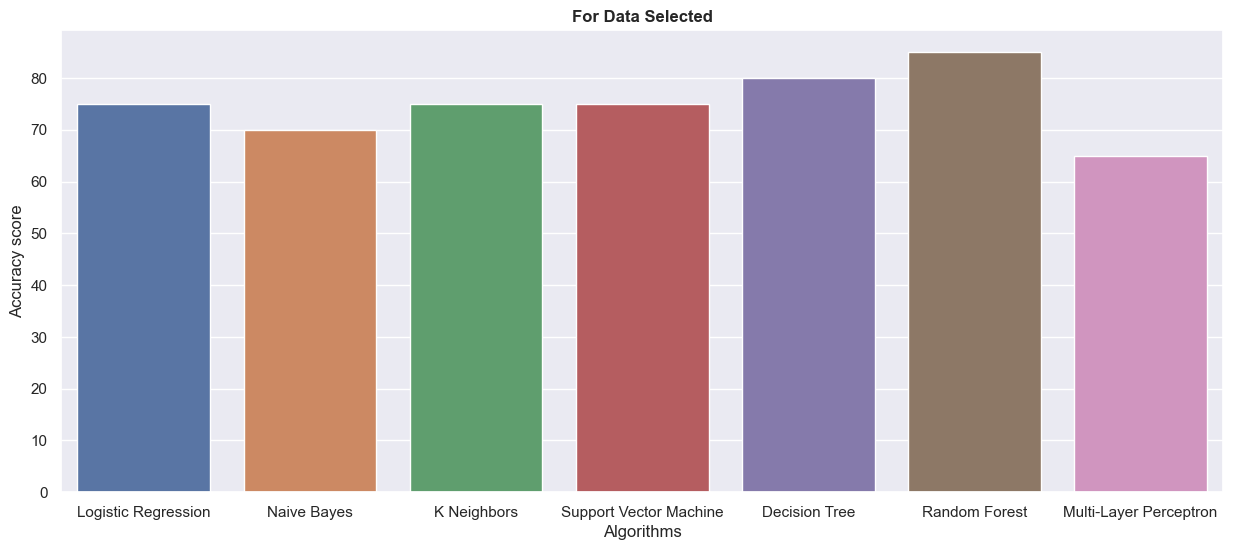

In [84]:
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title('For Data Selected', fontweight='bold')

sns.barplot(x=algorithms,y=accuracys_selected)

## 6. Performance Comparison

In [78]:
# for Dataset
algorithms = np.array(['Logistic Regression', 'Naive Bayes', 'K Neighbors', 'SVM', 'Decision Tree', 'Random Forest', 'Multi-Layer Perceptron'])
scores = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']

lr = [accuracy_lr, precision_lr, recall_lr, f1_score_lr, roc_auc_lr]
nb = [accuracy_nb, precision_nb, recall_nb, f1_score_nb, roc_auc_nb]
knn = [score_knn, score_knn, score_knn, score_knn, score_knn]
svm = [accuracy_svm, precision_svm, recall_svm, f1_score_svm, roc_auc_svm]
dt = [accuracy_dt, precision_dt, recall_dt, f1_score_dt, roc_auc_dt]
rf = [accuracy_rf, precision_rf, recall_rf, f1_score_rf, roc_auc_rf]
mlp = [accuracy_mlp, precision_mlp, recall_mlp, f1_score_mlp, roc_auc_mlp]

print("Evaluation of algorithms in test part of Dataset")
data = np.array([lr, nb, knn, svm, dt, rf, mlp])
pd.DataFrame(data, algorithms, scores)

Evaluation of algorithms in test part of Dataset


,Accuracy,Precision,Recall,F1-Score,ROC AUC Score
Logistic Regression,70.0,69.23,81.82,75.00,68.69
Naive Bayes,75.0,87.50,63.64,73.68,76.26
K Neighbors,75.0,75.00,75.00,75.00,75.00
SVM,55.0,55.00,100.00,70.97,50.00
Decision Tree,70.0,69.23,81.82,75.00,68.69
Random Forest,85.0,78.57,100.00,88.00,83.33
Multi-Layer Perceptron,60.0,61.54,72.73,66.67,58.59


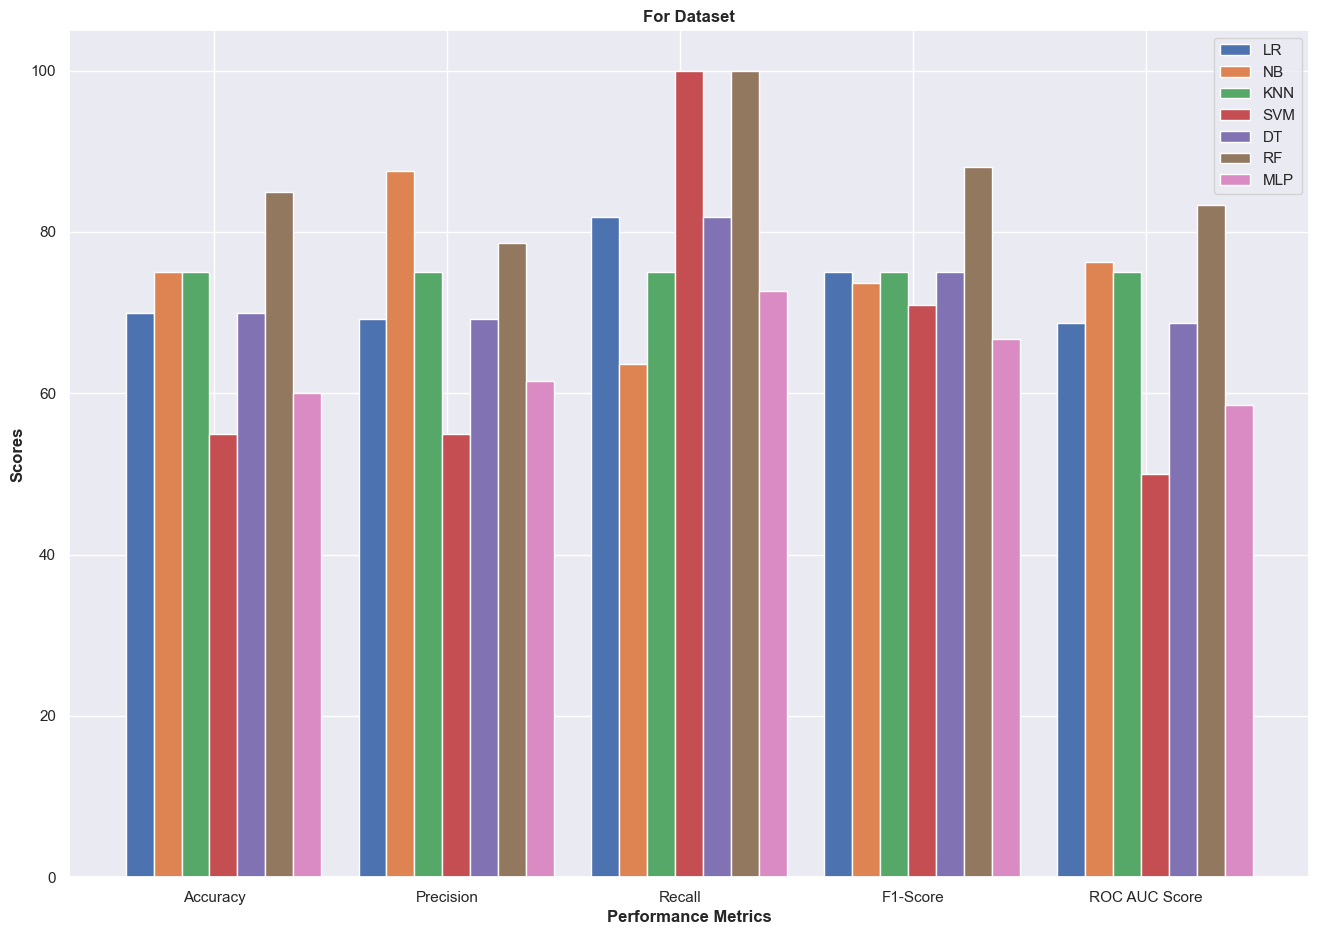

In [79]:
rcParams['figure.figsize'] = 16, 11

barWidth = 0.12
r1 = np.arange(len(lr))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

plt.bar(r1, lr, width=barWidth, edgecolor='white', label='LR')
plt.bar(r2, nb, width=barWidth, edgecolor='white', label='NB')
plt.bar(r3, knn, width=barWidth, edgecolor='white', label='KNN')
plt.bar(r4, svm, width=barWidth, edgecolor='white', label='SVM')
plt.bar(r5, dt, width=barWidth, edgecolor='white', label='DT')
plt.bar(r6, rf, width=barWidth, edgecolor='white', label='RF')
plt.bar(r7, mlp, width=barWidth, edgecolor='white', label='MLP')

plt.xlabel('Performance Metrics', fontweight='bold')
plt.xticks([r+ .2 + barWidth for r in range(len(lr))], scores)
plt.ylabel('Scores', fontweight='bold')
plt.title('For Dataset', fontweight='bold')

plt.legend()
plt.show()

In [80]:
# for data_selected
algorithms = np.array(['Logistic Regression', 'Naive Bayes', 'K Neighbors', 'SVM', 'Decision Tree', 'Random Forest', 'Multi-Layer Perceptron'])
scores = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']

lr_selected = [accuracy_lr_selected, precision_lr_selected, recall_lr_selected, f1_score_lr_selected, roc_auc_lr_selected]
nb_selected = [accuracy_nb_selected, precision_nb_selected, recall_nb_selected, f1_score_nb_selected, roc_auc_nb_selected]
knn_selected = [score_knn_selected, score_knn_selected, score_knn_selected, score_knn_selected, score_knn_selected]
svm_selected = [accuracy_svm_selected, precision_svm_selected, recall_svm_selected, f1_score_svm_selected, roc_auc_svm_selected]
dt_selected = [accuracy_dt_selected, precision_dt_selected, recall_dt_selected, f1_score_dt_selected, roc_auc_dt_selected]
rf_selected = [accuracy_rf_selected, precision_rf_selected, recall_rf_selected, f1_score_rf_selected, roc_auc_rf_selected]
mlp_selected = [accuracy_mlp_selected, precision_mlp_selected, recall_mlp_selected, f1_score_mlp_selected, roc_auc_mlp_selected]

print("Evaluation of algorithms in test part of Data Selected")
data_selected = np.array([lr_selected, nb_selected, knn_selected, svm_selected, dt_selected, rf_selected, mlp_selected])
pd.DataFrame(data_selected, algorithms, scores)

Evaluation of algorithms in test part of Data Selected


,Accuracy,Precision,Recall,F1-Score,ROC AUC Score
Logistic Regression,75.0,75.00,81.82,78.26,74.24
Naive Bayes,70.0,77.78,63.64,70.00,70.71
K Neighbors,85.0,85.00,85.00,85.00,85.00
SVM,75.0,75.00,81.82,78.26,74.24
Decision Tree,80.0,81.82,81.82,81.82,79.80
Random Forest,85.0,83.33,90.91,86.96,84.34
Multi-Layer Perceptron,65.0,70.00,63.64,66.67,65.15


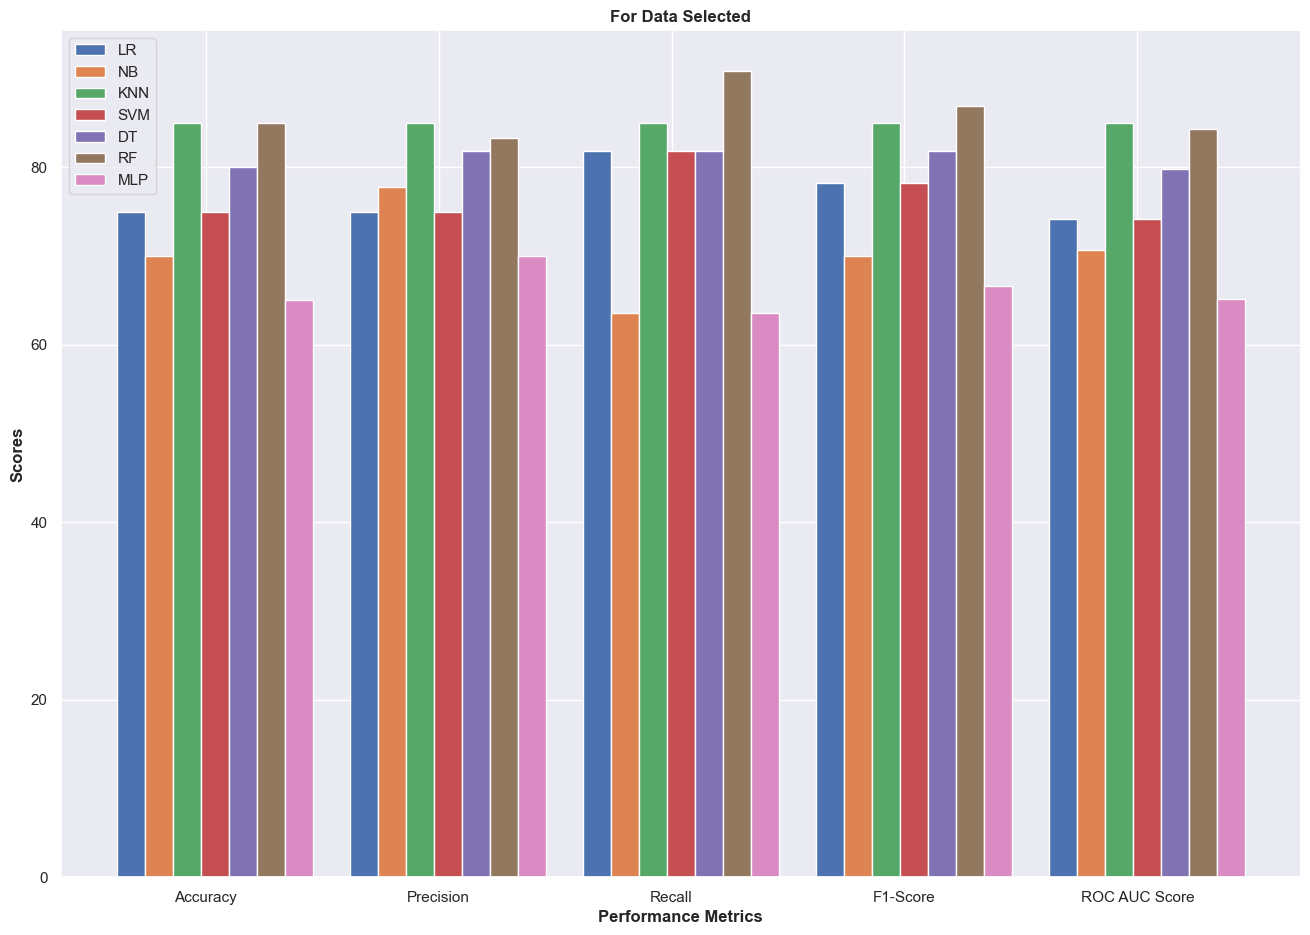

In [81]:
rcParams['figure.figsize'] = 16, 11

barWidth = 0.12
r1 = np.arange(len(lr_selected))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]

plt.bar(r1, lr_selected, width=barWidth, edgecolor='white', label='LR')
plt.bar(r2, nb_selected, width=barWidth, edgecolor='white', label='NB')
plt.bar(r3, knn_selected, width=barWidth, edgecolor='white', label='KNN')
plt.bar(r4, svm_selected, width=barWidth, edgecolor='white', label='SVM')
plt.bar(r5, dt_selected, width=barWidth, edgecolor='white', label='DT')
plt.bar(r6, rf_selected, width=barWidth, edgecolor='white', label='RF')
plt.bar(r7, mlp_selected, width=barWidth, edgecolor='white', label='MLP')

plt.xlabel('Performance Metrics', fontweight='bold')
plt.xticks([r+ .2 + barWidth for r in range(len(lr))], scores)
plt.ylabel('Scores', fontweight='bold')
plt.title('For Data Selected', fontweight='bold')

plt.legend()
plt.show()
